In [22]:
from IPython.display import display, Markdown, HTML

content = """
<h1 style="font-size:30px;">Problem Statement</h1>
<p style="font-size:18px;">
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short-term basis for a price or for free. Many bike share systems allow people to borrow a bike from a "dock," which is usually computer-controlled, wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
</p>
<p style="font-size:18px;">
A US bike-sharing provider, BoomBikes, has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown ends and the economy restores to a healthy state.
</p>
<p style="font-size:18px;">
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among people once the ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to people's needs once the situation gets better all around, stand out from other service providers, and make huge profits.
</p>

<h2 style="font-size:25px;">Details</h2>
<p style="font-size:18px;">
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
1. Which variables are significant in predicting the demand for shared bikes?
2. How well those variables describe the bike demands?
</p>
<h1 style="font-size:30px;">Business Goal</h1>
<p style="font-size:18px;">
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 
</p>

<h1 style="font-size:30px;">#Section 1: Importing Libraries</h1>
"""

display(Markdown(content))



<h1 style="font-size:30px;">Problem Statement</h1>
<p style="font-size:18px;">
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short-term basis for a price or for free. Many bike share systems allow people to borrow a bike from a "dock," which is usually computer-controlled, wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
</p>
<p style="font-size:18px;">
A US bike-sharing provider, BoomBikes, has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown ends and the economy restores to a healthy state.
</p>
<p style="font-size:18px;">
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among people once the ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to people's needs once the situation gets better all around, stand out from other service providers, and make huge profits.
</p>

<h2 style="font-size:25px;">Details</h2>
<p style="font-size:18px;">
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
1. Which variables are significant in predicting the demand for shared bikes?
2. How well those variables describe the bike demands?
</p>
<h1 style="font-size:30px;">Business Goal</h1>
<p style="font-size:18px;">
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 
</p>

<h1 style="font-size:30px;">#Section 1: Importing Libraries</h1>


In [23]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [26]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [211]:
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("matplotlib version:", matplotlib.__version__) 
print("seaborn version:", sns.__version__)
print("sklearn version:", sklearn.__version__)  # This is where you check sklearn version
print("statsmodels version:", statsmodels.__version__)

pandas version: 2.2.2
numpy version: 1.26.4
matplotlib version: 3.9.2
seaborn version: 0.13.2
sklearn version: 1.5.1
statsmodels version: 0.14.2


In [28]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [29]:
content="""<h1 style="font-size:30px;">#Section 2: Loading and Basic Data Understanding</h1>
<h2>#Section 2.1: Loading Dataset</h3>
"""
display(Markdown(content))

<h1 style="font-size:30px;">#Section 2: Loading and Basic Data Understanding</h1>
<h2>#Section 2.1: Loading Dataset</h3>


In [30]:
boombikes = pd.read_csv('day.csv')
boombikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit     temp    atemp      hum  windspeed  casual  registered   cnt  
0           2 14.11085 18.18125 80.58330   10.74988     331         654   985  
1           2 14.90260 17.68695 69.60870   16.65211     131         670   801  
2           1  8.05092  9.47025 43.72730   16.63670     120        1229  1349  
3           1  8.20000 10.60610 59.04350   10.73983     108        1454  1562  
4           1  9.30524 11.46350 43.69570   12.52230      82        1518  1600

In [31]:
content="""<h2>#Section 2.2: Basic Observations and Data Understanding</h2>"""
display(Markdown(content))

<h2>#Section 2.2: Basic Observations and Data Understanding</h2>

In [32]:
print(f'Given dataset contains {boombikes.shape[0]} rows and {boombikes.shape[1]} columns.')

Given dataset contains 730 rows and 16 columns.


In [33]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [34]:
content="""<h3>Observations</h3>
<ul style="font-size:15px">
    <li>Dataset contains 730 rows</li>
    <li>Dataset contains 16 columns</li>
    <li style="font-weight:bold">Dataset does not have null values. Hence, null value handling will not be done as a part of this assignment.</li>
</ul>
"""
display(Markdown(content))

<h3>Observations</h3>
<ul style="font-size:15px">
    <li>Dataset contains 730 rows</li>
    <li>Dataset contains 16 columns</li>
    <li style="font-weight:bold">Dataset does not have null values. Hence, null value handling will not be done as a part of this assignment.</li>
</ul>


In [35]:
# Checking for duplicate values:
len(boombikes[boombikes.duplicated()])

0

In [36]:
content="""<p>No duplicate values found!</p>
"""
display(Markdown(content))

<p>No duplicate values found!</p>


In [37]:
content="""<h3>#Section 2.2.1: Feature Understanding</h3>"""
display(Markdown(content))

<h3>#Section 2.2.1: Feature Understanding</h3>

In [38]:
content = """
<h5>Following information about various columns has been extracted from the data dictionary provided.</h5>
<p>
=========================================
Dataset characteristics
=========================================
</p>
<p>
day.csv have the following fields:
<ul>
	<li>instant: record index</li>
	<li>dteday: date</li>
	<li>season: season (1:spring, 2:summer, 3:fall, 4:winter)</li>
	<li>yr: year (0: 2018, 1:2019)</li>
	<li>mnth: month (1 to 12)</li>
	<li>holiday: weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)</li>
	<li>weekday: day of the week</li>
	<li>workingday: if day is neither weekend nor holiday is 1, otherwise is 0.</li>
	<li>weathersit:
		<ul>
			<li>1: Clear, Few clouds, Partly cloudy</li>
			<li>2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist</li>
			<li>3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds</li>
			<li>4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog</li>
		</ul>
	</li>
	<li>temp: temperature in Celsius</li>
	<li>atemp: feeling temperature in Celsius</li>
	<li>hum: humidity</li>
	<li>windspeed: wind speed</li>
	<li>casual: count of casual users</li>
	<li>registered: count of registered users </li>
	<li>cnt: count of total rental bikes including both casual and registered</li>
</ul>

</p>
<p style="font-weight:bold">cnt is used as the Target Variable</p>
<p style="font-weight:bold">cnt is the sum of casual and registered, hence both these columns will be dropped at a later stage post visualization</p>
<p>
=========================================
License
=========================================
</p>
<p>
Use of this dataset in publications must be cited to the following publication:
<pre>
[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

@article{
	year={2013},
	issn={2192-6352},
	journal={Progress in Artificial Intelligence},
	doi={10.1007/s13748-013-0040-3},
	title={Event labeling combining ensemble detectors and background knowledge},
	url={http://dx.doi.org/10.1007/s13748-013-0040-3},
	publisher={Springer Berlin Heidelberg},
	keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
	author={Fanaee-T, Hadi and Gama, Joao},
	pages={1-15}
}
</pre>
</p>
<p>
=========================================
Contact
=========================================
</p>
<p>
For further information about this dataset please contact Hadi Fanaee-T (hadi.fanaee@fe.up.pt)
</p>
"""

# Render the HTML content
display(HTML(content))

In [39]:
content="""<h4>Dropping features based on above information</h4>"""
display(Markdown(content))

<h4>Dropping features based on above information</h4>

In [40]:
# Creating a variable to store list of feature names to be dropped

drop_col= ['instant', 'dteday']

# for lopp to drop columns
for i in boombikes.columns:
	if i in drop_col:
		boombikes.drop(labels = i, axis = 1, inplace = True)

boombikes.head(2)

season  yr  mnth  holiday  weekday  workingday  weathersit     temp  \
0       1   0     1        0        6           0           2 14.11085   
1       1   0     1        0        0           0           2 14.90260   

     atemp      hum  windspeed  casual  registered  cnt  
0 18.18125 80.58330   10.74988     331         654  985  
1 17.68695 69.60870   16.65211     131         670  801

In [41]:
content="""<h5>Data Assessment</h5>"""
display(Markdown(content))

<h5>Data Assessment</h5>

In [42]:
boombikes.describe()

season        yr      mnth   holiday   weekday  workingday  \
count 730.00000 730.00000 730.00000 730.00000 730.00000   730.00000   
mean    2.49863   0.50000   6.52603   0.02877   2.99726     0.68356   
std     1.11018   0.50034   3.45022   0.16727   2.00616     0.46541   
min     1.00000   0.00000   1.00000   0.00000   0.00000     0.00000   
25%     2.00000   0.00000   4.00000   0.00000   1.00000     0.00000   
50%     3.00000   0.50000   7.00000   0.00000   3.00000     1.00000   
75%     3.00000   1.00000  10.00000   0.00000   5.00000     1.00000   
max     4.00000   1.00000  12.00000   1.00000   6.00000     1.00000   

       weathersit      temp     atemp       hum  windspeed     casual  \
count   730.00000 730.00000 730.00000 730.00000  730.00000  730.00000   
mean      1.39452  20.31926  23.72632  62.76517   12.76362  849.24932   
std       0.54481   7.50673   8.15031  14.23759    5.19584  686.47987   
min       1.00000   2.42435   3.95348   0.00000    1.50024    2.00000   
25%       1.00000  13.81189  16.88971  52.00000    9.04165  316.25000   
50%       1.00000  20.46583  24.36822  62.62500   12.12533  717.00000   
75%       2.00000  26.88061  30.44577  72.98958   15.62559 1096.50000   
max       3.00000  35.32835  42.04480  97.25000   34.00002 3410.00000   

       registered        cnt  
count   730.00000  730.00000  
mean   3658.75753 4508.00685  
std    1559.75873 1936.01165  
min      20.00000   22.00000  
25%    2502.25000 3169.75000  
50%    3664.50000 4548.50000  
75%    4783.25000 5966.00000  
max    6946.00000 8714.00000

In [43]:
print(boombikes[['season', 'mnth']].dtypes)

season    int64
mnth      int64
dtype: object


In [44]:
# Transforming the weathersit feature:

boombikes['weathersit'] = boombikes['weathersit'].map({
1:'Clear to Partly Cloudy', 2:'Misty and Cloudy', 3:'Light Rain or Snow',4:'Heavy Rain or Snow'})


# Transforming season feature:

boombikes['season']= boombikes['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

# Mapping Month Feature:

boombikes['mnth'] = boombikes['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul', 8:'Aug',9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

#Mapping Weekday feature:
boombikes['weekday']= boombikes['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

# Checking the dataset values again

boombikes.head()


season  yr mnth  holiday weekday  workingday              weathersit  \
0  Spring   0  Jan        0     Sat           0        Misty and Cloudy   
1  Spring   0  Jan        0     Sun           0        Misty and Cloudy   
2  Spring   0  Jan        0     Mon           1  Clear to Partly Cloudy   
3  Spring   0  Jan        0     Tue           1  Clear to Partly Cloudy   
4  Spring   0  Jan        0     Wed           1  Clear to Partly Cloudy   

      temp    atemp      hum  windspeed  casual  registered   cnt  
0 14.11085 18.18125 80.58330   10.74988     331         654   985  
1 14.90260 17.68695 69.60870   16.65211     131         670   801  
2  8.05092  9.47025 43.72730   16.63670     120        1229  1349  
3  8.20000 10.60610 59.04350   10.73983     108        1454  1562  
4  9.30524 11.46350 43.69570   12.52230      82        1518  1600

In [45]:
print(boombikes[['season', 'mnth']].dtypes)

season    object
mnth      object
dtype: object


In [46]:
content="""<h1 style="font-size:30px;">#Section 3: Exploratory Data Analysis</h1>
<h2>#Section 3.1: Univariate Analysis</h2>
<h3>#Section 3.1.1: Target Variable</h3>
"""
display(Markdown(content))

<h1 style="font-size:30px;">#Section 3: Exploratory Data Analysis</h1>
<h2>#Section 3.1: Univariate Analysis</h2>
<h3>#Section 3.1.1: Target Variable</h3>


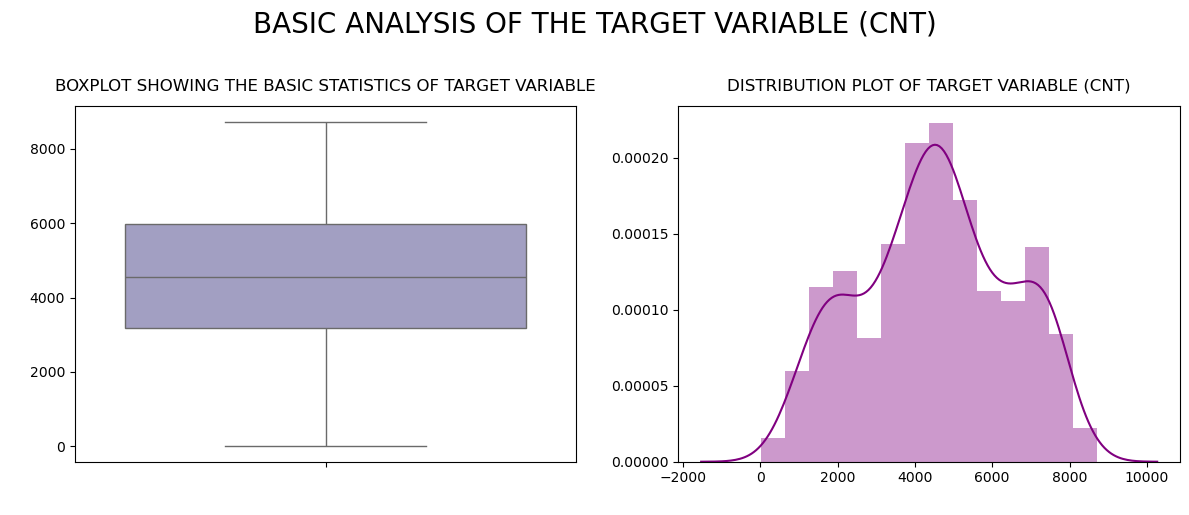

In [47]:
# Creating a Subplot grid:

fig, ax=plt.subplots(nrows =1, ncols =2, figsize = (12,5))

# The Main Heading
fig.suptitle('Basic Analysis of the Target Variable (cnt)'.upper(),fontsize =20, y = 1.02)

# Populating Box plot1:
sns.boxplot(y=boombikes['cnt'], ax=ax[0], palette='Purples')
ax[0].set_title('boxplot showing the basic statistics of target variable'.upper(), fontsize=12, fontweight =20, y=1.02)
ax[0].set_ylabel(' ')
ax[0].set_xlabel(' ')

# Populating Dist plot2:
sns.distplot(boombikes['cnt'], ax=ax[1], color='purple')
ax[1].set_title('distribution plot of target variable (cnt)'.upper(), fontsize =12, fontweight=20, y=1.02 )

ax[1].set_ylabel(' ')
ax[1].set_xlabel(' ')

# Setting Asthetics
plt.tight_layout() 

plt.show()

In [48]:
content="""
<h3>Observations</h3>
<ul style="font-size:15px">
<li>The target variable exhibits an approximately normal distribution with two distinct plateaus on either side.</li>

<li>The first quartile (Q1) of the target variable is around 3000, while the third quartile (Q3) is approximately 6000, resulting in an interquartile range (IQR) of about 3000. The median value is close to 4500.</li>
</ul>"""
display(Markdown(content))


<h3>Observations</h3>
<ul style="font-size:15px">
<li>The target variable exhibits an approximately normal distribution with two distinct plateaus on either side.</li>

<li>The first quartile (Q1) of the target variable is around 3000, while the third quartile (Q3) is approximately 6000, resulting in an interquartile range (IQR) of about 3000. The median value is close to 4500.</li>
</ul>

In [49]:
content="""<h3>#Section 3.1.2: Continous Independent Variable</h3>
"""
display(Markdown(content))

<h3>#Section 3.1.2: Continous Independent Variable</h3>


In [50]:
# Creating a list of continuous independent variables for analysis

cont_var = [i for i in boombikes.select_dtypes(exclude='object').columns if boombikes[i].nunique() > 2 and i != 'cnt']

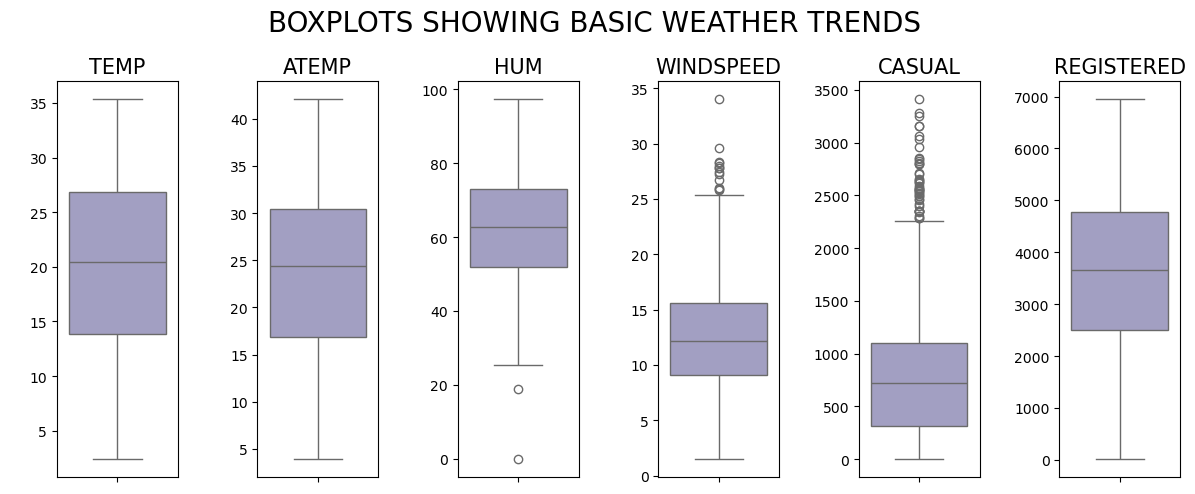

In [51]:
# Creating a subplot grid

fig, ax = plt.subplots(nrows = 1, ncols = len(cont_var), figsize=(12,5))

# The Main Heading
plt.suptitle('Boxplots showing basic weather trends'.upper(), fontsize = 20)

# Creation of ForLoop to fill subplot grid with plots

for i in range(len(cont_var)):
    sns.boxplot(y=boombikes[cont_var[i]], ax=ax[i], palette='Purples')
    ax[i].set_title(f'{cont_var[i].upper()}', fontsize=15) # Set title inside the loop
    ax[i].set_ylabel(' ') # Optional: Removes unnecessary y-labels for cleaner aesthetics

# Adjusting layout for better readability
plt.tight_layout()
plt.show()

In [52]:
content="""
<h3>Observations</h3>
<ul style="font-size:14px">
<li>Q1 and Q3 of TEMP are distributed between 14 and 27 with a median as 21</li>
<li>Q1 and Q3 of ATEMP are distributed between 17 and 31 with a median as 24</li>
<li>HUMIDITY and WINDSPEED have shown the presence of outliers and casuals</li>
<li>TEMP and ATEMP appear to be almost normally distributed</li>
</ul>"""
display(Markdown(content))


<h3>Observations</h3>
<ul style="font-size:14px">
<li>Q1 and Q3 of TEMP are distributed between 14 and 27 with a median as 21</li>
<li>Q1 and Q3 of ATEMP are distributed between 17 and 31 with a median as 24</li>
<li>HUMIDITY and WINDSPEED have shown the presence of outliers and casuals</li>
<li>TEMP and ATEMP appear to be almost normally distributed</li>
</ul>

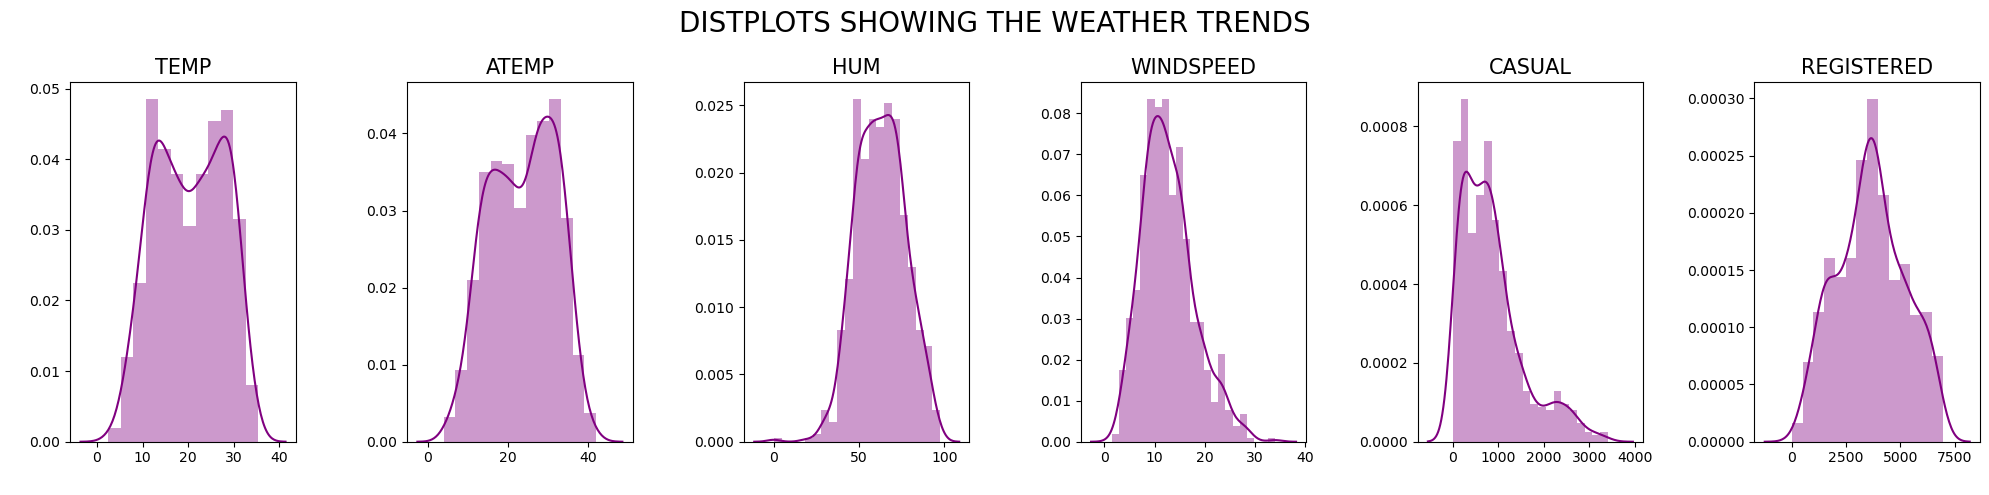

In [53]:
# Creating a subplot grid
fig, ax = plt.subplots(nrows = 1, ncols = len(cont_var), figsize=(20,5))

# The Main Heading
plt.suptitle('Distplots showing the weather trends'.upper(), fontsize = 20)

# Creation of ForLoop to fill subplot grid with plots

for i in range(len(cont_var)):
    sns.distplot(boombikes[cont_var[i]], ax=ax[i], color='purple')
    ax[i].set_title(f'{cont_var[i].upper()}', fontsize=15) # Set title inside the loop
    ax[i].set_xlabel(' ') # Optional: Removes unnecessary x-labels for cleaner aesthetics	
    ax[i].set_ylabel(' ') # Optional: Removes unnecessary y-labels for cleaner aesthetics

# Adjusting layout for better readability
plt.tight_layout()
plt.show()

In [54]:
content="""
<h3>Observations</h3>
<ul style="font-size:14px">
<li>The TEMP and ATEMP distplots above demonstrate that our previous intuitive understanding of the variable was inaccurate.</li>
<li>WINDSPEED is biased to the right, and HUMIDITY is slanted to the left.</li>
<li>There is a substantial right skew in CASUAL.</li>
<li>Although the trend of the REGISTERED variable is comparable to that of the TARGET variable, the plateaus on each side are comparatively smoother.</li>
</ul>"""
display(Markdown(content))


<h3>Observations</h3>
<ul style="font-size:14px">
<li>The TEMP and ATEMP distplots above demonstrate that our previous intuitive understanding of the variable was inaccurate.</li>
<li>WINDSPEED is biased to the right, and HUMIDITY is slanted to the left.</li>
<li>There is a substantial right skew in CASUAL.</li>
<li>Although the trend of the REGISTERED variable is comparable to that of the TARGET variable, the plateaus on each side are comparatively smoother.</li>
</ul>

In [55]:
content="""<h3>#Section 3.1.3: Categorical Independent Variable</h3>
"""
display(Markdown(content))

<h3>#Section 3.1.3: Categorical Independent Variable</h3>


In [56]:
# Creating a list of Categorical independent variables for analysis
cat_var = [i for i in boombikes.select_dtypes(include= 'object').columns]
cat_var.extend([i for i in boombikes.columns if boombikes[i].nunique() == 2])

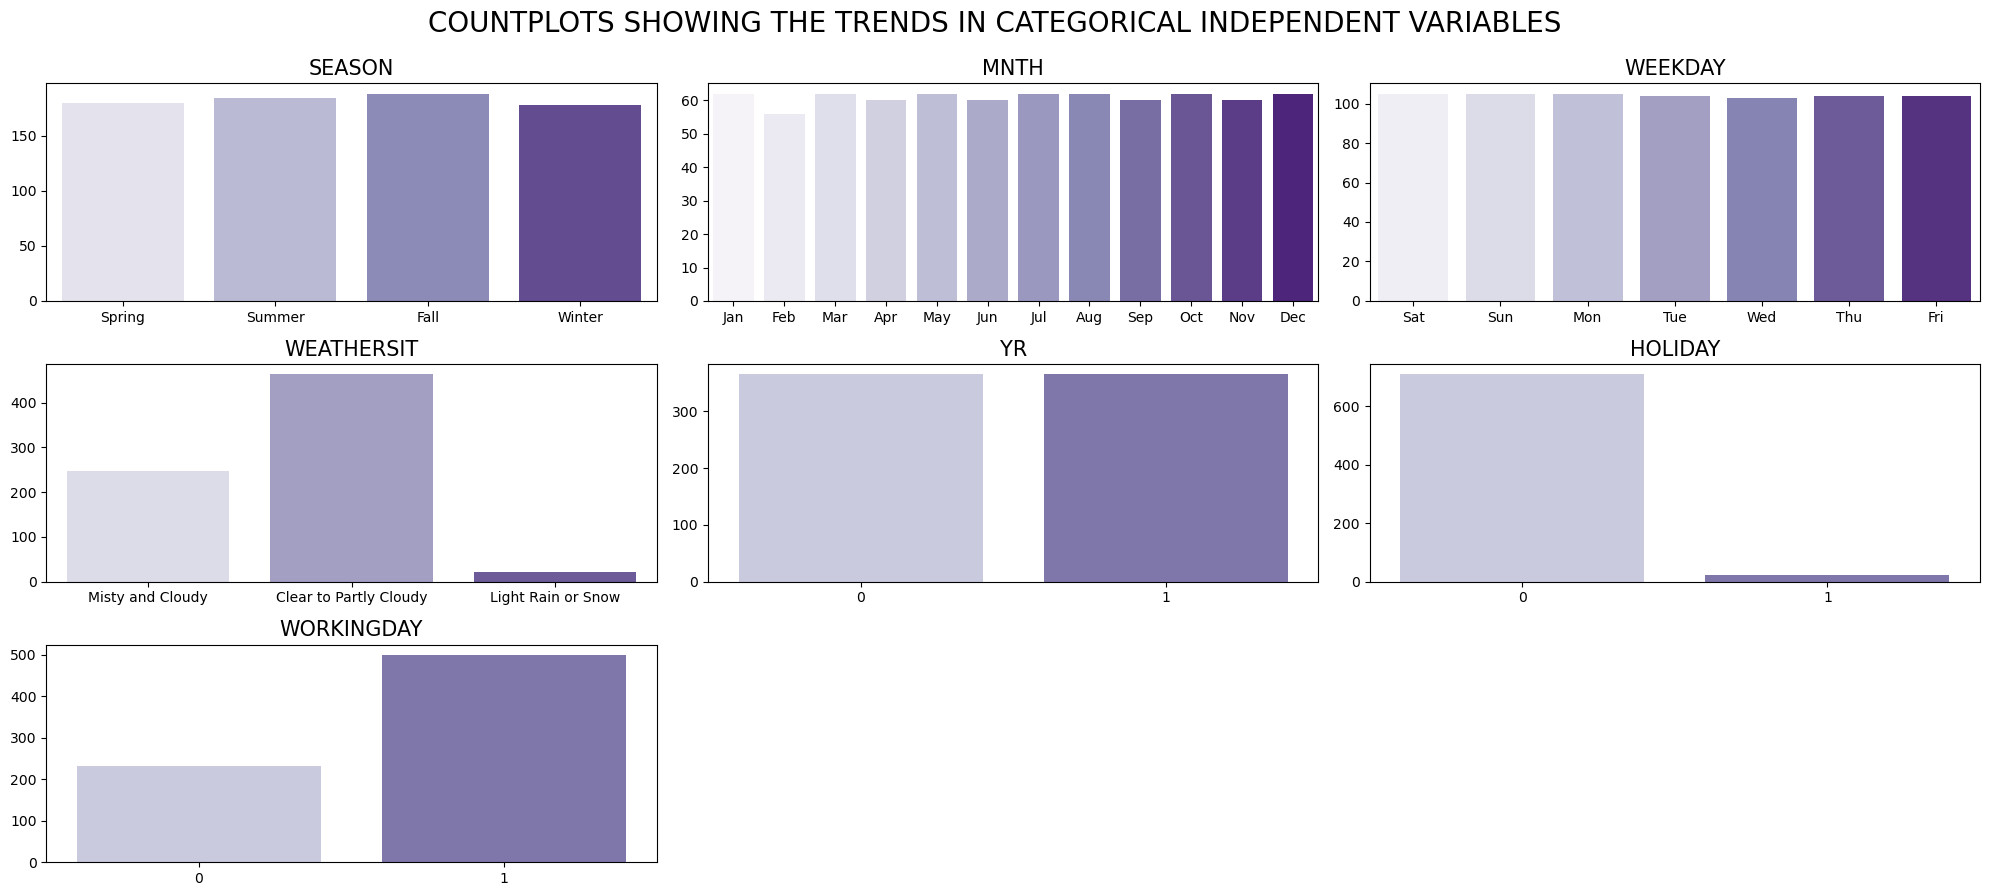

In [57]:
# Dynamically calculate the grid size based on the number of variables
n_cols = 3  # Set the number of columns
n_rows = int(np.ceil(len(cat_var) / n_cols))  # Calculate the required rows

# Creating a subplot grid
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 9))

# The Main Heading
plt.suptitle('Countplots showing the trends in categorical independent variables'.upper(), fontsize=20, y=0.99)

# Flatten axes array for easier indexing
ax = ax.flatten()

# ForLoop to fill subplot grid with plots
for k in range(len(cat_var)):
    sns.countplot(data=boombikes, x=cat_var[k], ax=ax[k], palette='Purples')
    ax[k].set_title(f'{cat_var[k].upper()}', fontsize=15)
    ax[k].set_ylabel('')  # Optional: Removes unnecessary y-labels for cleaner aesthetics
    ax[k].set_xlabel('')  # Optional: Removes unnecessary x-labels for cleaner aesthetics

# Hide unused subplots if len(cat_var) is not a perfect multiple of n_cols
for k in range(len(cat_var), len(ax)):
    fig.delaxes(ax[k])

# Adjusting layout for better readability
plt.tight_layout()
plt.show()

In [58]:
content="""
<h3>Observations</h3>
<ul style="font-size:14px">
<li>The longest season is observed to be fall, which is followed by summer and spring. Winter is the shortest season.</li>
<li>WEATHERSIT displays only three weather kinds. There haven't even been any days with HEAVY RAIN or SNOW. For the majority of the days in both years, the weather has been either clear or partly cloudy.</li>
<li>The odd combination of "WEATHERSIT" and "Season" also indicates that the city in the dataset is located in a tropical area with little rainfall, which is similar to the climate of a west coast US city in California (such as Los Angeles or San Francisco). 
The observed HUMIDITY, TEMP, and ATEMP statistics further support this assertion.</li>
</ul>"""
display(Markdown(content))


<h3>Observations</h3>
<ul style="font-size:14px">
<li>The longest season is observed to be fall, which is followed by summer and spring. Winter is the shortest season.</li>
<li>WEATHERSIT displays only three weather kinds. There haven't even been any days with HEAVY RAIN or SNOW. For the majority of the days in both years, the weather has been either clear or partly cloudy.</li>
<li>The odd combination of "WEATHERSIT" and "Season" also indicates that the city in the dataset is located in a tropical area with little rainfall, which is similar to the climate of a west coast US city in California (such as Los Angeles or San Francisco). 
The observed HUMIDITY, TEMP, and ATEMP statistics further support this assertion.</li>
</ul>

In [59]:
content="""<h2>#Section 3.2: Bivariate Analysis</h2>
<h3>#Section 3.2.1: Continuous Independent Variable</h3>
"""
display(Markdown(content))

<h2>#Section 3.2: Bivariate Analysis</h2>
<h3>#Section 3.2.1: Continuous Independent Variable</h3>


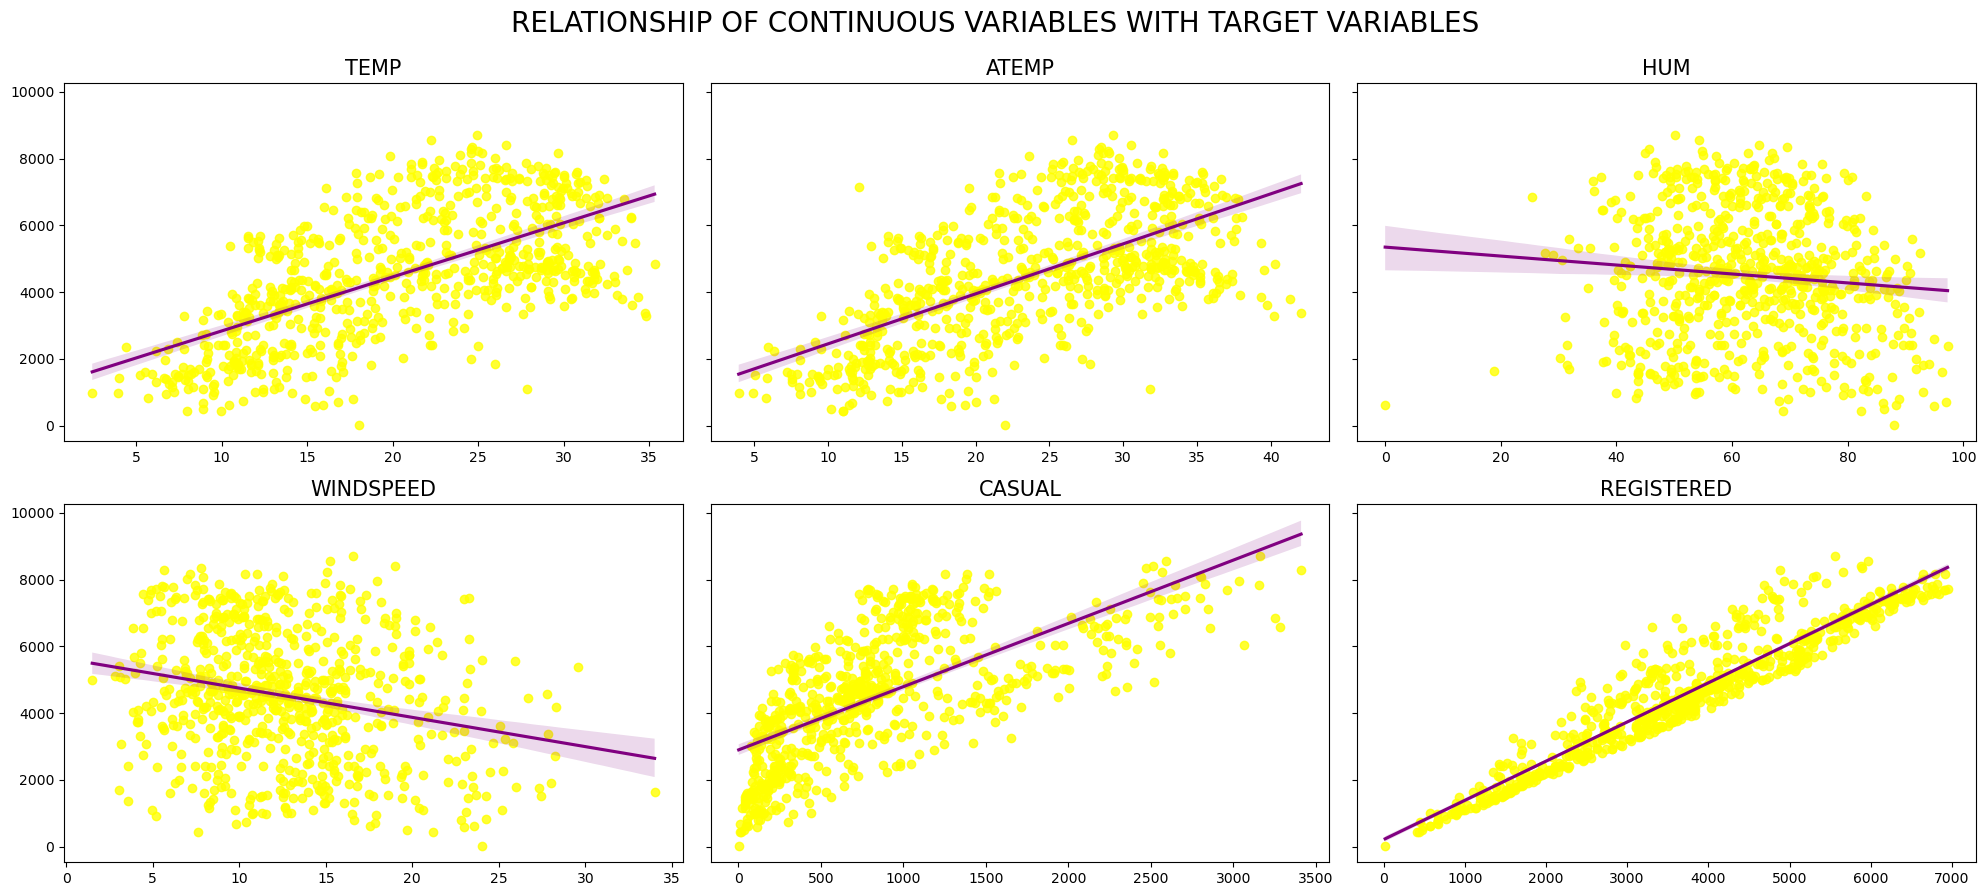

In [60]:
# Creating a subplot grid
fig, ax = plt.subplots(nrows = 2, ncols=int(len(cont_var)/2), figsize= (20,9), sharey = True)

# The Main Heading
plt.suptitle('Relationship of Continuous variables with Target variables'.upper(), fontsize=20, y=0.99)

# ForLoop to fill subplot grid with plots
k=0
for i in range(2):
    for j in range(int(len(cat_var)/2)):
        sns.regplot(x= boombikes[cont_var[k]], y=boombikes['cnt'], ax= ax[i,j], scatter_kws = {'color':'yellow'}, line_kws = {'color':'purple'})
        ax[i,j].set_title(f'{cont_var[k].upper()}', fontsize= 15)
        ax[i,j].set_ylabel('')  # Optional: Removes unnecessary y-labels for cleaner aesthetics 
        ax[i,j].set_xlabel('')  # Optional: Removes unnecessary x-labels for cleaner aesthetics
        k+=1


# Adjusting layout for better readability
plt.tight_layout()
plt.show()

In [61]:
content="""
<h3>Observations</h3>
<ul style="font-size:14px">
<li>Bike demand exhibits a positive and directly proportional relationship with TEMP and ATEMP.</li>
<li>Bike demand has an inverse relationship with HUMIDITY and WINDSPEED.</li>
<li>Bike demand increases in direct proportion to both Casual and Registered user numbers.</li>
<li>Registered users play a significant role in explaining bike demand effectively.</li>
"""
display(Markdown(content))


<h3>Observations</h3>
<ul style="font-size:14px">
<li>Bike demand exhibits a positive and directly proportional relationship with TEMP and ATEMP.</li>
<li>Bike demand has an inverse relationship with HUMIDITY and WINDSPEED.</li>
<li>Bike demand increases in direct proportion to both Casual and Registered user numbers.</li>
<li>Registered users play a significant role in explaining bike demand effectively.</li>


In [62]:
content="""<h3>#Section 3.2.2: Categorical Independent Variable</h3>
"""
display(Markdown(content))

<h3>#Section 3.2.2: Categorical Independent Variable</h3>


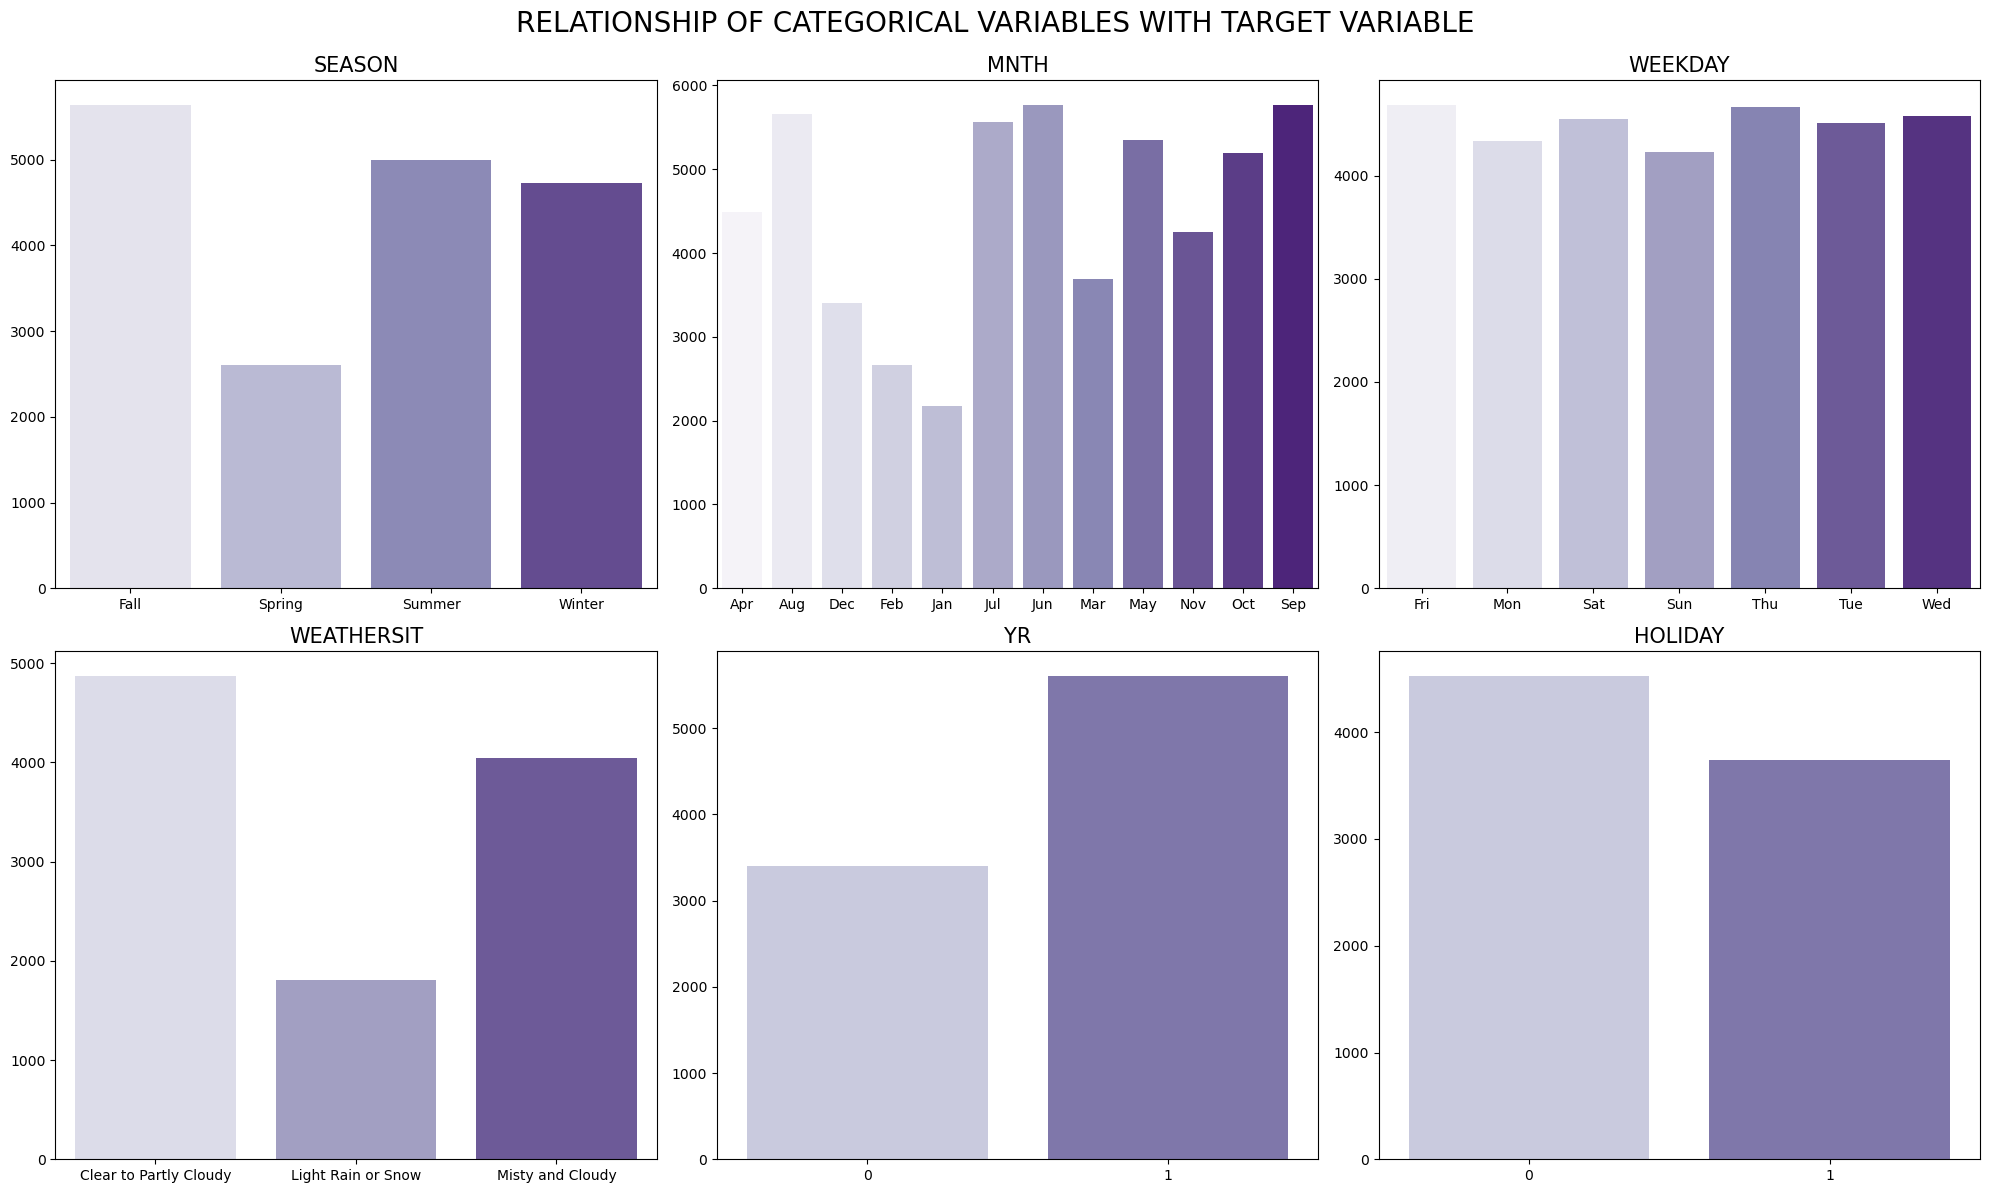

In [63]:
# Create a subplot grid
fig, ax = plt.subplots(nrows=2, ncols=int(len(cat_var) / 2), figsize=(20, 12))

# Main title for the entire figure
plt.suptitle('Relationship of categorical variables with target variable'.upper(), fontsize=20, y=0.99)

# Loop to fill the subplot grid
k = 0
for i in range(2):
    for j in range(int(len(cat_var) / 2)):
        # Calculate the mean of 'cnt' for each category in the current categorical variable
        mean_cnt = boombikes.groupby(cat_var[k])['cnt'].mean().reset_index()
        
        # Create the barplot
        sns.barplot(x=cat_var[k], y='cnt', data=mean_cnt, ax=ax[i, j], palette='Purples')
        
        # Title for each subplot
        ax[i, j].set_title(f'{cat_var[k].upper()}', fontsize=15)
        ax[i, j].set_ylabel('')  # Remove y-axis labels for cleaner aesthetics
        ax[i, j].set_xlabel('')  # Remove x-axis labels for cleaner aesthetics
        
        # Increment k to use the next categorical variable
        k += 1

# Adjust layout for better readability
plt.tight_layout()
plt.show()

In [64]:
content="""<h3>Observations</h3>
<ul style="font-size:15px">
<li>The highest demand is observed during the FALL season, followed by SUMMER and WINTER, while SPRING sees a sharp drop in demand.</li>

<li>The months of August, June, and September show the highest demand, closely followed by July, May, and October. This establishes a six-month high-demand period from May to October, highlighting the significant impact of seasonality on the business.</li>

<li>Demand is strongest on Fridays, Saturdays, Sundays, and Thursdays, indicating that bike usage caters to both commuting and leisure purposes.</li>

<li>Bike demand peaks on clear weather days, showcasing a strong correlation between weather conditions and usage patterns.</li>

<li>The company has experienced a notable growth in business from 2018 to 2019.</li>

<li>Bike usage on holidays is slightly lower compared to weekdays, and overall usage remains fairly consistent regardless of whether it’s a working day or not.
</li>
</ul>"""
display(Markdown(content))

<h3>Observations</h3>
<ul style="font-size:15px">
<li>The highest demand is observed during the FALL season, followed by SUMMER and WINTER, while SPRING sees a sharp drop in demand.</li>

<li>The months of August, June, and September show the highest demand, closely followed by July, May, and October. This establishes a six-month high-demand period from May to October, highlighting the significant impact of seasonality on the business.</li>

<li>Demand is strongest on Fridays, Saturdays, Sundays, and Thursdays, indicating that bike usage caters to both commuting and leisure purposes.</li>

<li>Bike demand peaks on clear weather days, showcasing a strong correlation between weather conditions and usage patterns.</li>

<li>The company has experienced a notable growth in business from 2018 to 2019.</li>

<li>Bike usage on holidays is slightly lower compared to weekdays, and overall usage remains fairly consistent regardless of whether it’s a working day or not.
</li>
</ul>

In [207]:
content="""<h3>Demand comparison on Working Day and Non-Working Day</h3>"""
display(Markdown(content))

<h3>Demand comparison on Working Day and Non-Working Day</h3>

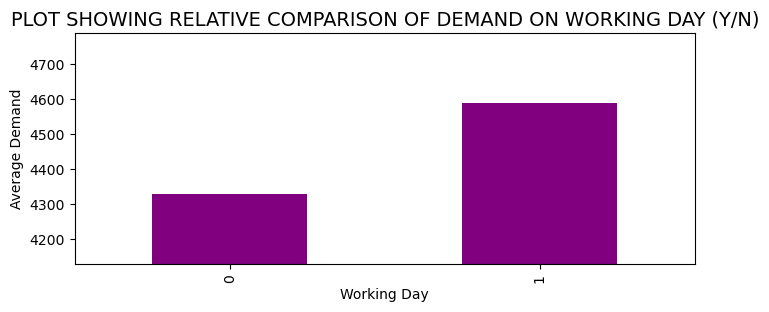

In [66]:
# Calculate the mean 'cnt' for each 'workingday' group
working_day_avg = boombikes.groupby('workingday')['cnt'].mean()

# Plotting
plt.figure(figsize=(8, 3))
plt.title('Plot Showing Relative Comparison of Demand on Working Day (Y/N)'.upper(), fontsize=14)
working_day_avg.plot(kind='bar', color='purple')  # Correct the method to `kind='bar'`

# Labels and limits
plt.ylabel('Average Demand', fontsize=10)
plt.xlabel('Working Day', fontsize=10)
plt.ylim(working_day_avg.min() - 200, working_day_avg.max() + 200)  # Dynamically adjust ylim

# Display the plot
plt.show()

In [67]:
content="""
<h3>Observations</h3>
<ul style="font-size:15px">
<li>As we know 0 is Working Day and 1 is Weekend or Holiday. During non-working days, usage is reported to be higher.</li>

<li>The demand difference is small because weekday demand is just about 3% lower.</li>

<li>Remember our earlier graphic that illustrates the cause of this? On weekdays, a greater number of days with weak demand are driving the average demand downward, but on weekends, strong demand on every day raises the average demand.</li>
</ul>
"""
display(Markdown(content))


<h3>Observations</h3>
<ul style="font-size:15px">
<li>As we know 0 is Working Day and 1 is Weekend or Holiday. During non-working days, usage is reported to be higher.</li>

<li>The demand difference is small because weekday demand is just about 3% lower.</li>

<li>Remember our earlier graphic that illustrates the cause of this? On weekdays, a greater number of days with weak demand are driving the average demand downward, but on weekends, strong demand on every day raises the average demand.</li>
</ul>


In [68]:
content="""<h3>#Section 3.2.3: Seasonwise variation in weather related continuous variables</h3>
"""
display(Markdown(content))

<h3>#Section 3.2.3: Seasonwise variation in weather related continuous variables</h3>


In [69]:
# Initializing feature list for weather related continuous variables:
weather_var = ['temp','atemp','hum','windspeed']

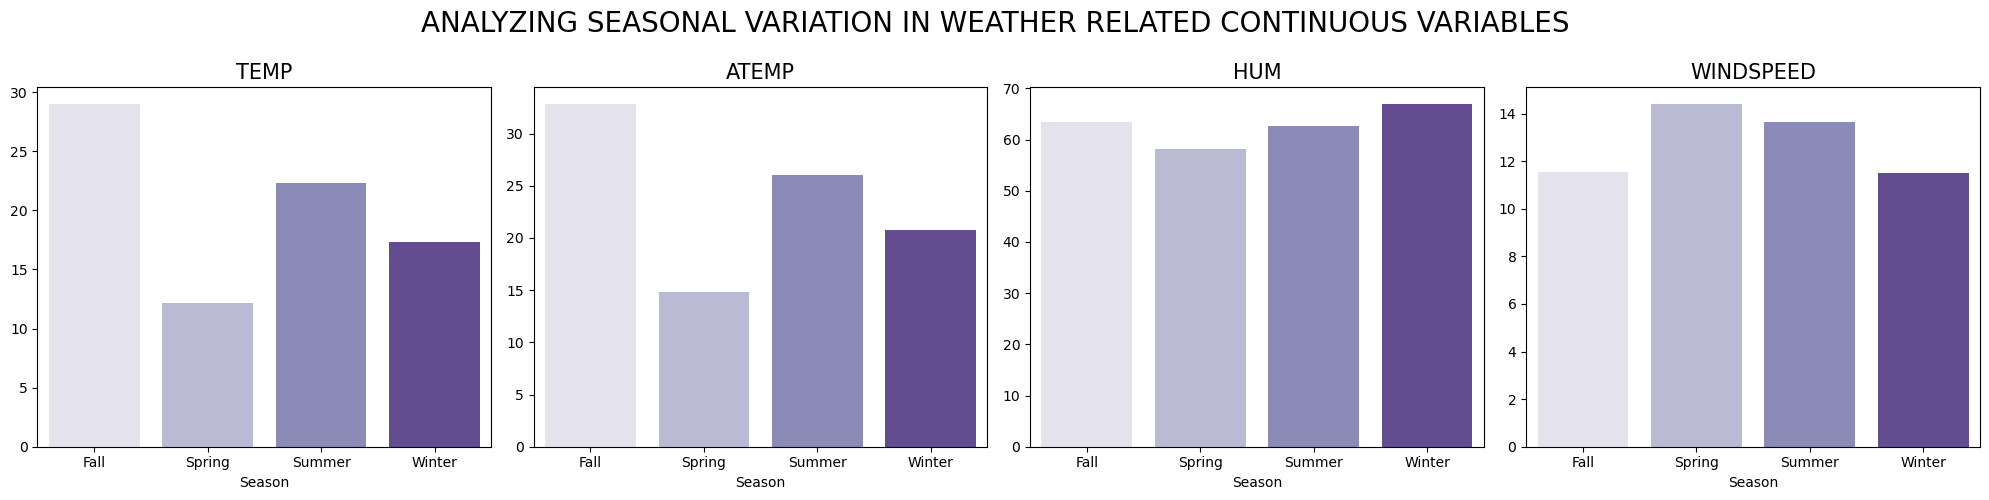

In [70]:
# Calculate the mean for weather variables grouped by 'season' beforehand
season_mean = boombikes.groupby(by='season')[weather_var].mean()

# Creating a subplot grid
fig, ax = plt.subplots(nrows=1, ncols=len(weather_var), figsize=(20, 5))

# The Main Heading
plt.suptitle('Analyzing Seasonal Variation in Weather Related Continuous Variables'.upper(),
             fontsize=20, fontweight=15, y=0.99)

# Loop to fill the subplot grid
for i in range(len(weather_var)):
    sns.barplot(y=season_mean[weather_var[i]],  # Use pre-calculated mean for each weather variable
                x=season_mean.index, ax=ax[i], palette='Purples')
    # Title for each subplot
    ax[i].set_title(f'{weather_var[i].upper()}', fontsize=15)
    ax[i].set_ylabel('')  # Remove y-axis labels for cleaner aesthetics
    ax[i].set_xlabel('Season')  # Add a label for the x-axis to clarify

# Adjust layout for better readability
plt.tight_layout()
plt.show()

In [71]:
content="""<h3>Observations</h3>
<ul style="font-size:15px">
<li>The weather variables display an unusual pattern, with the highest average temperature and perceived temperature occurring during the FALL season, followed by SUMMER.</li>

<li>Instead of WINTER, SPRING exhibits relatively lower average temperature and perceived temperature.</li>

<li>Humidity peaks in the WINTER season, followed by FALL, SUMMER, and SPRING.</li>

<li>Windspeed is highest in SPRING, with SUMMER coming in second.</li>
</ul>
"""
display(Markdown(content))

<h3>Observations</h3>
<ul style="font-size:15px">
<li>The weather variables display an unusual pattern, with the highest average temperature and perceived temperature occurring during the FALL season, followed by SUMMER.</li>

<li>Instead of WINTER, SPRING exhibits relatively lower average temperature and perceived temperature.</li>

<li>Humidity peaks in the WINTER season, followed by FALL, SUMMER, and SPRING.</li>

<li>Windspeed is highest in SPRING, with SUMMER coming in second.</li>
</ul>


In [72]:
content="""<h3>A reference table that displays the month-by-month and season-by-season variations of continuous weather phenomena may be found below.</h3>
"""
display(Markdown(content))

<h3>A reference table that displays the month-by-month and season-by-season variations of continuous weather phenomena may be found below.</h3>


In [73]:
# Group by 'season' and 'mnth' with mean aggregation
season_month_mean = boombikes.groupby(by=['season', 'mnth']).agg(
    {
        'yr': 'mean',
        'holiday': 'mean',
        'workingday': 'mean',
        'temp': 'mean',
        'atemp': 'mean',
        'hum': 'mean',
        'windspeed': 'mean',
        'casual': 'mean',
        'registered': 'mean',
        'cnt': 'mean',
        'season': 'first',  # Show first value of 'season' in each group
        'mnth': 'first'     # Show first value of 'mnth' in each group
    }
)

# Capitalize column names
season_month_mean.columns = [col.upper() for col in season_month_mean.columns]

# Format row indices (capitalize and add padding)
season_month_mean.index = season_month_mean.index.map(
    lambda x: (f"{x[0].upper():<10}", f"{x[1].upper():<5}")
)

# Print the result
print(season_month_mean)

                      YR  HOLIDAY  WORKINGDAY     TEMP    ATEMP      HUM  \
season     mnth                                                            
FALL       AUG   0.50000  0.00000     0.74194 29.05184 32.57374 63.77301   
           JUL   0.50000  0.03226     0.66129 30.97429 35.20469 59.78763   
           JUN   0.50000  0.00000     0.75000 29.81554 33.56743 54.40625   
           SEP   0.50000  0.04545     0.65909 25.59775 29.35985 71.83132   
SPRING     DEC   0.50000  0.09091     0.59091 12.21599 14.72987 63.84248   
           FEB   0.50000  0.03571     0.67857 12.23525 14.94305 56.32269   
           JAN   0.50000  0.04839     0.64516  9.69420 11.98979 58.58283   
           MAR   0.50000  0.00000     0.70000 16.01250 19.13531 56.98311   
SUMMER     APR   0.50000  0.03333     0.66667 19.26995 22.85404 58.80631   
           JUN   0.50000  0.00000     0.70000 27.16421 31.08471 59.16770   
           MAR   0.50000  0.00000     0.77273 16.01134 19.02927 62.23732   
           M

In [74]:
# Aggregating data
season_month_mean = boombikes.groupby(by=['season', 'mnth']).agg(
    {
        'yr': 'mean',
        'holiday': 'mean',
        'workingday': 'mean',
        'temp': 'mean',
        'atemp': 'mean',
        'hum': 'mean',
        'windspeed': 'mean',
        'casual': 'mean',
        'registered': 'mean',
        'cnt': 'mean',
        'season': 'first',  # Show first value of 'season' in each group
        'mnth': 'first'     # Show first value of 'mnth' in each group
    }
)

# Capitalize column names
season_month_mean.columns = [col.upper() for col in season_month_mean.columns]

# Format row indices (capitalize and add padding)
season_month_mean.index = season_month_mean.index.map(
    lambda x: (f"{x[0].upper():<10}", f"{x[1].upper():<5}")
)

# Style function for specific columns
def highlight_cells(val):
    if isinstance(val, str):
        return 'background-color: yellow; font-weight: bold; text-transform: uppercase;'
    return ''

# Apply styling to the DataFrame
season_month_mean_styled = season_month_mean.reset_index().style.applymap(
    highlight_cells, subset=['SEASON', 'MNTH']
)

# Display the styled DataFrame
season_month_mean_styled

In [75]:
content="""<h3>#Section 3.2.4: Weather wise variation in weather related continuous variables</h3>
"""
display(Markdown(content))

<h3>#Section 3.2.4: Weather wise variation in weather related continuous variables</h3>


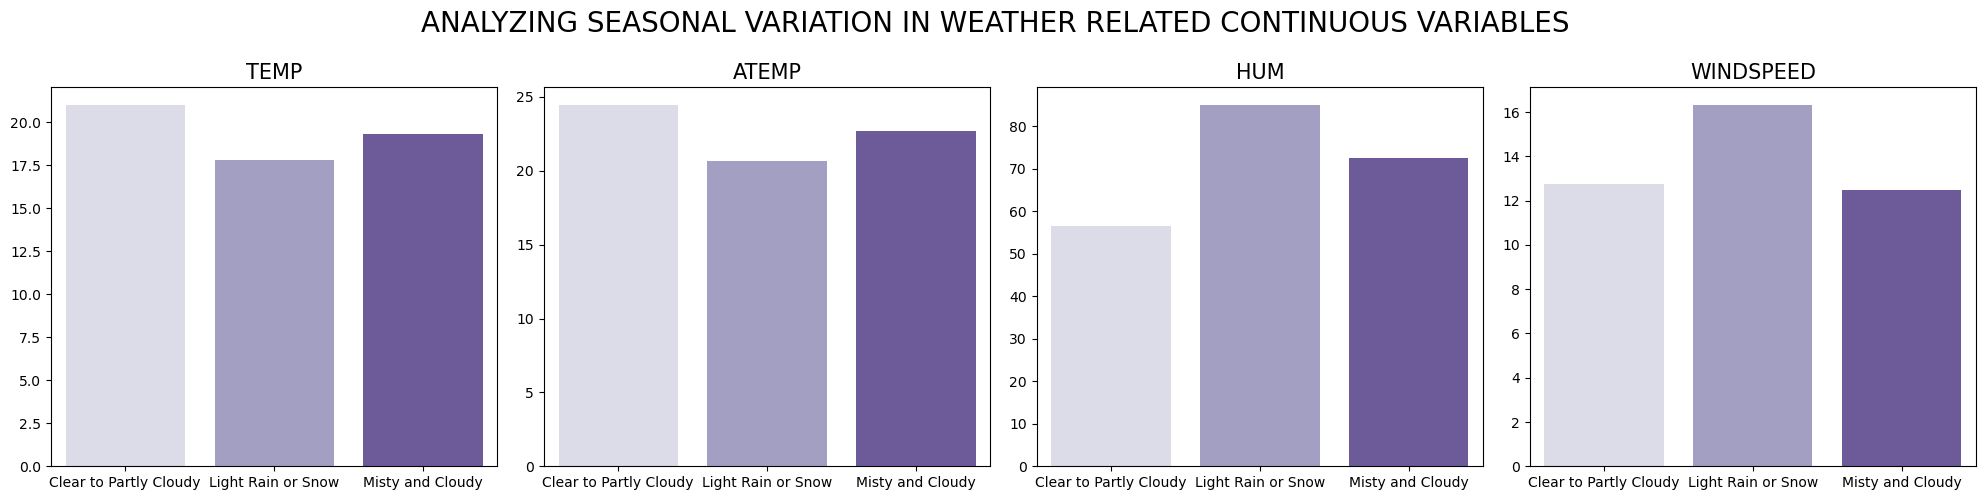

In [76]:
# Calculate the mean for weather variables grouped by 'season' beforehand
season_mean = boombikes.groupby(by='weathersit')[weather_var].mean()

# Creating a subplot grid
fig, ax = plt.subplots(nrows=1, ncols=len(weather_var), figsize=(20, 5))

# The Main Heading
plt.suptitle('Analyzing Seasonal Variation in Weather Related Continuous Variables'.upper(),
             fontsize=20, fontweight=15, y=0.99)

# Loop to fill the subplot grid
for i in range(len(weather_var)):
    sns.barplot(y=season_mean[weather_var[i]],  # Use pre-calculated mean for each weather variable
                x=season_mean.index, ax=ax[i], palette='Purples')
    # Title for each subplot
    ax[i].set_title(f'{weather_var[i].upper()}', fontsize=15)
    ax[i].set_ylabel('')  # Remove y-axis labels for cleaner aesthetics
    ax[i].set_xlabel('')  # Add a label for the x-axis to clarify

# Adjust layout for better readability
plt.tight_layout()
plt.show()

In [77]:
content="""<h3>Observations</h3>
<ul style="font-size:15px">
<li>The highest mean values for TEMP and ATEMP occur when the skies are clear to partly cloudy, followed by misty weather and light rain.</li>

<li>Humidity reaches its highest mean values during light rain, followed by misty weather, and then clear skies.</li>

<li>Windspeed exhibits its highest mean values during light rain.</li>

</ul>
"""
display(Markdown(content))

<h3>Observations</h3>
<ul style="font-size:15px">
<li>The highest mean values for TEMP and ATEMP occur when the skies are clear to partly cloudy, followed by misty weather and light rain.</li>

<li>Humidity reaches its highest mean values during light rain, followed by misty weather, and then clear skies.</li>

<li>Windspeed exhibits its highest mean values during light rain.</li>

</ul>


In [208]:
content="""<h3>#Section 3.2.5: Monthwise variation in weathersit</h3>"""
display(Markdown(content))

<h3>#Section 3.2.5: Monthwise variation in weathersit</h3>

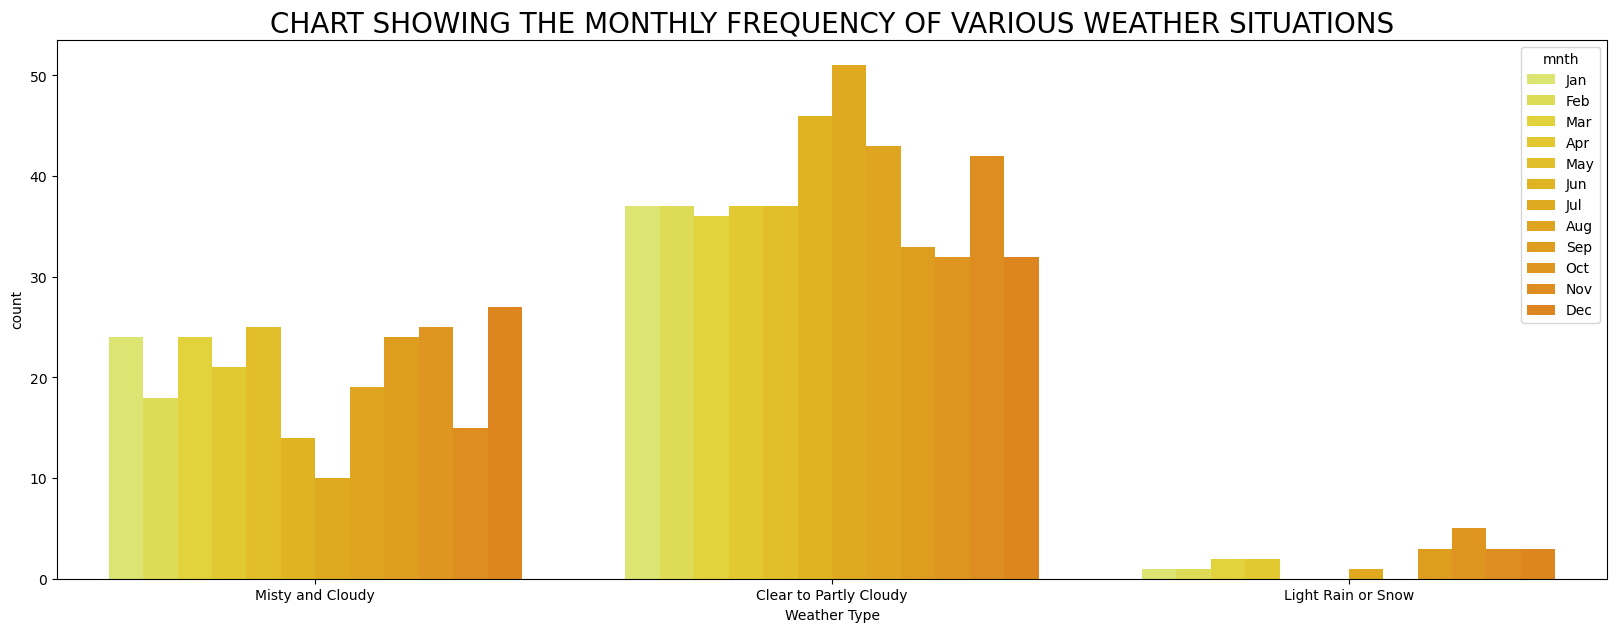

In [79]:
# Defining Figure size
plt.figure(figsize=(20, 7))

# Plotting
sns.countplot(x='weathersit', data=boombikes, hue='mnth', palette='Wistia')

# Adjusting labels and title
plt.title('Chart Showing the Monthly Frequency of Various Weather Situations'.upper(), fontsize=20)
plt.xlabel('Weather Type'.title())  # Fixed the method to set the xlabel correctly

plt.show()

In [80]:
content="""<h3>Observations</h3>
<ul style="font-size:15px">
<li>In general, the highest number of days have experienced 'Clear to Partly Cloudy' conditions, followed by 'Misty and Cloudy' weather.</li>

<li>July recorded the highest frequency of clear to partly cloudy days, followed by June and then August.</li>

<li>The highest occurrence of misty weather was observed in December, followed by January, March, May, and October.</li>

</ul>
"""
display(Markdown(content))

<h3>Observations</h3>
<ul style="font-size:15px">
<li>In general, the highest number of days have experienced 'Clear to Partly Cloudy' conditions, followed by 'Misty and Cloudy' weather.</li>

<li>July recorded the highest frequency of clear to partly cloudy days, followed by June and then August.</li>

<li>The highest occurrence of misty weather was observed in December, followed by January, March, May, and October.</li>

</ul>


In [81]:
content="""<h2>#Section 3.3: Intervariable Relationships</h2>
<h3>#Section 3.3.1: Intervariable relationships using pairplot</h3>
"""
display(Markdown(content))

<h2>#Section 3.3: Intervariable Relationships</h2>
<h3>#Section 3.3.1: Intervariable relationships using pairplot</h3>


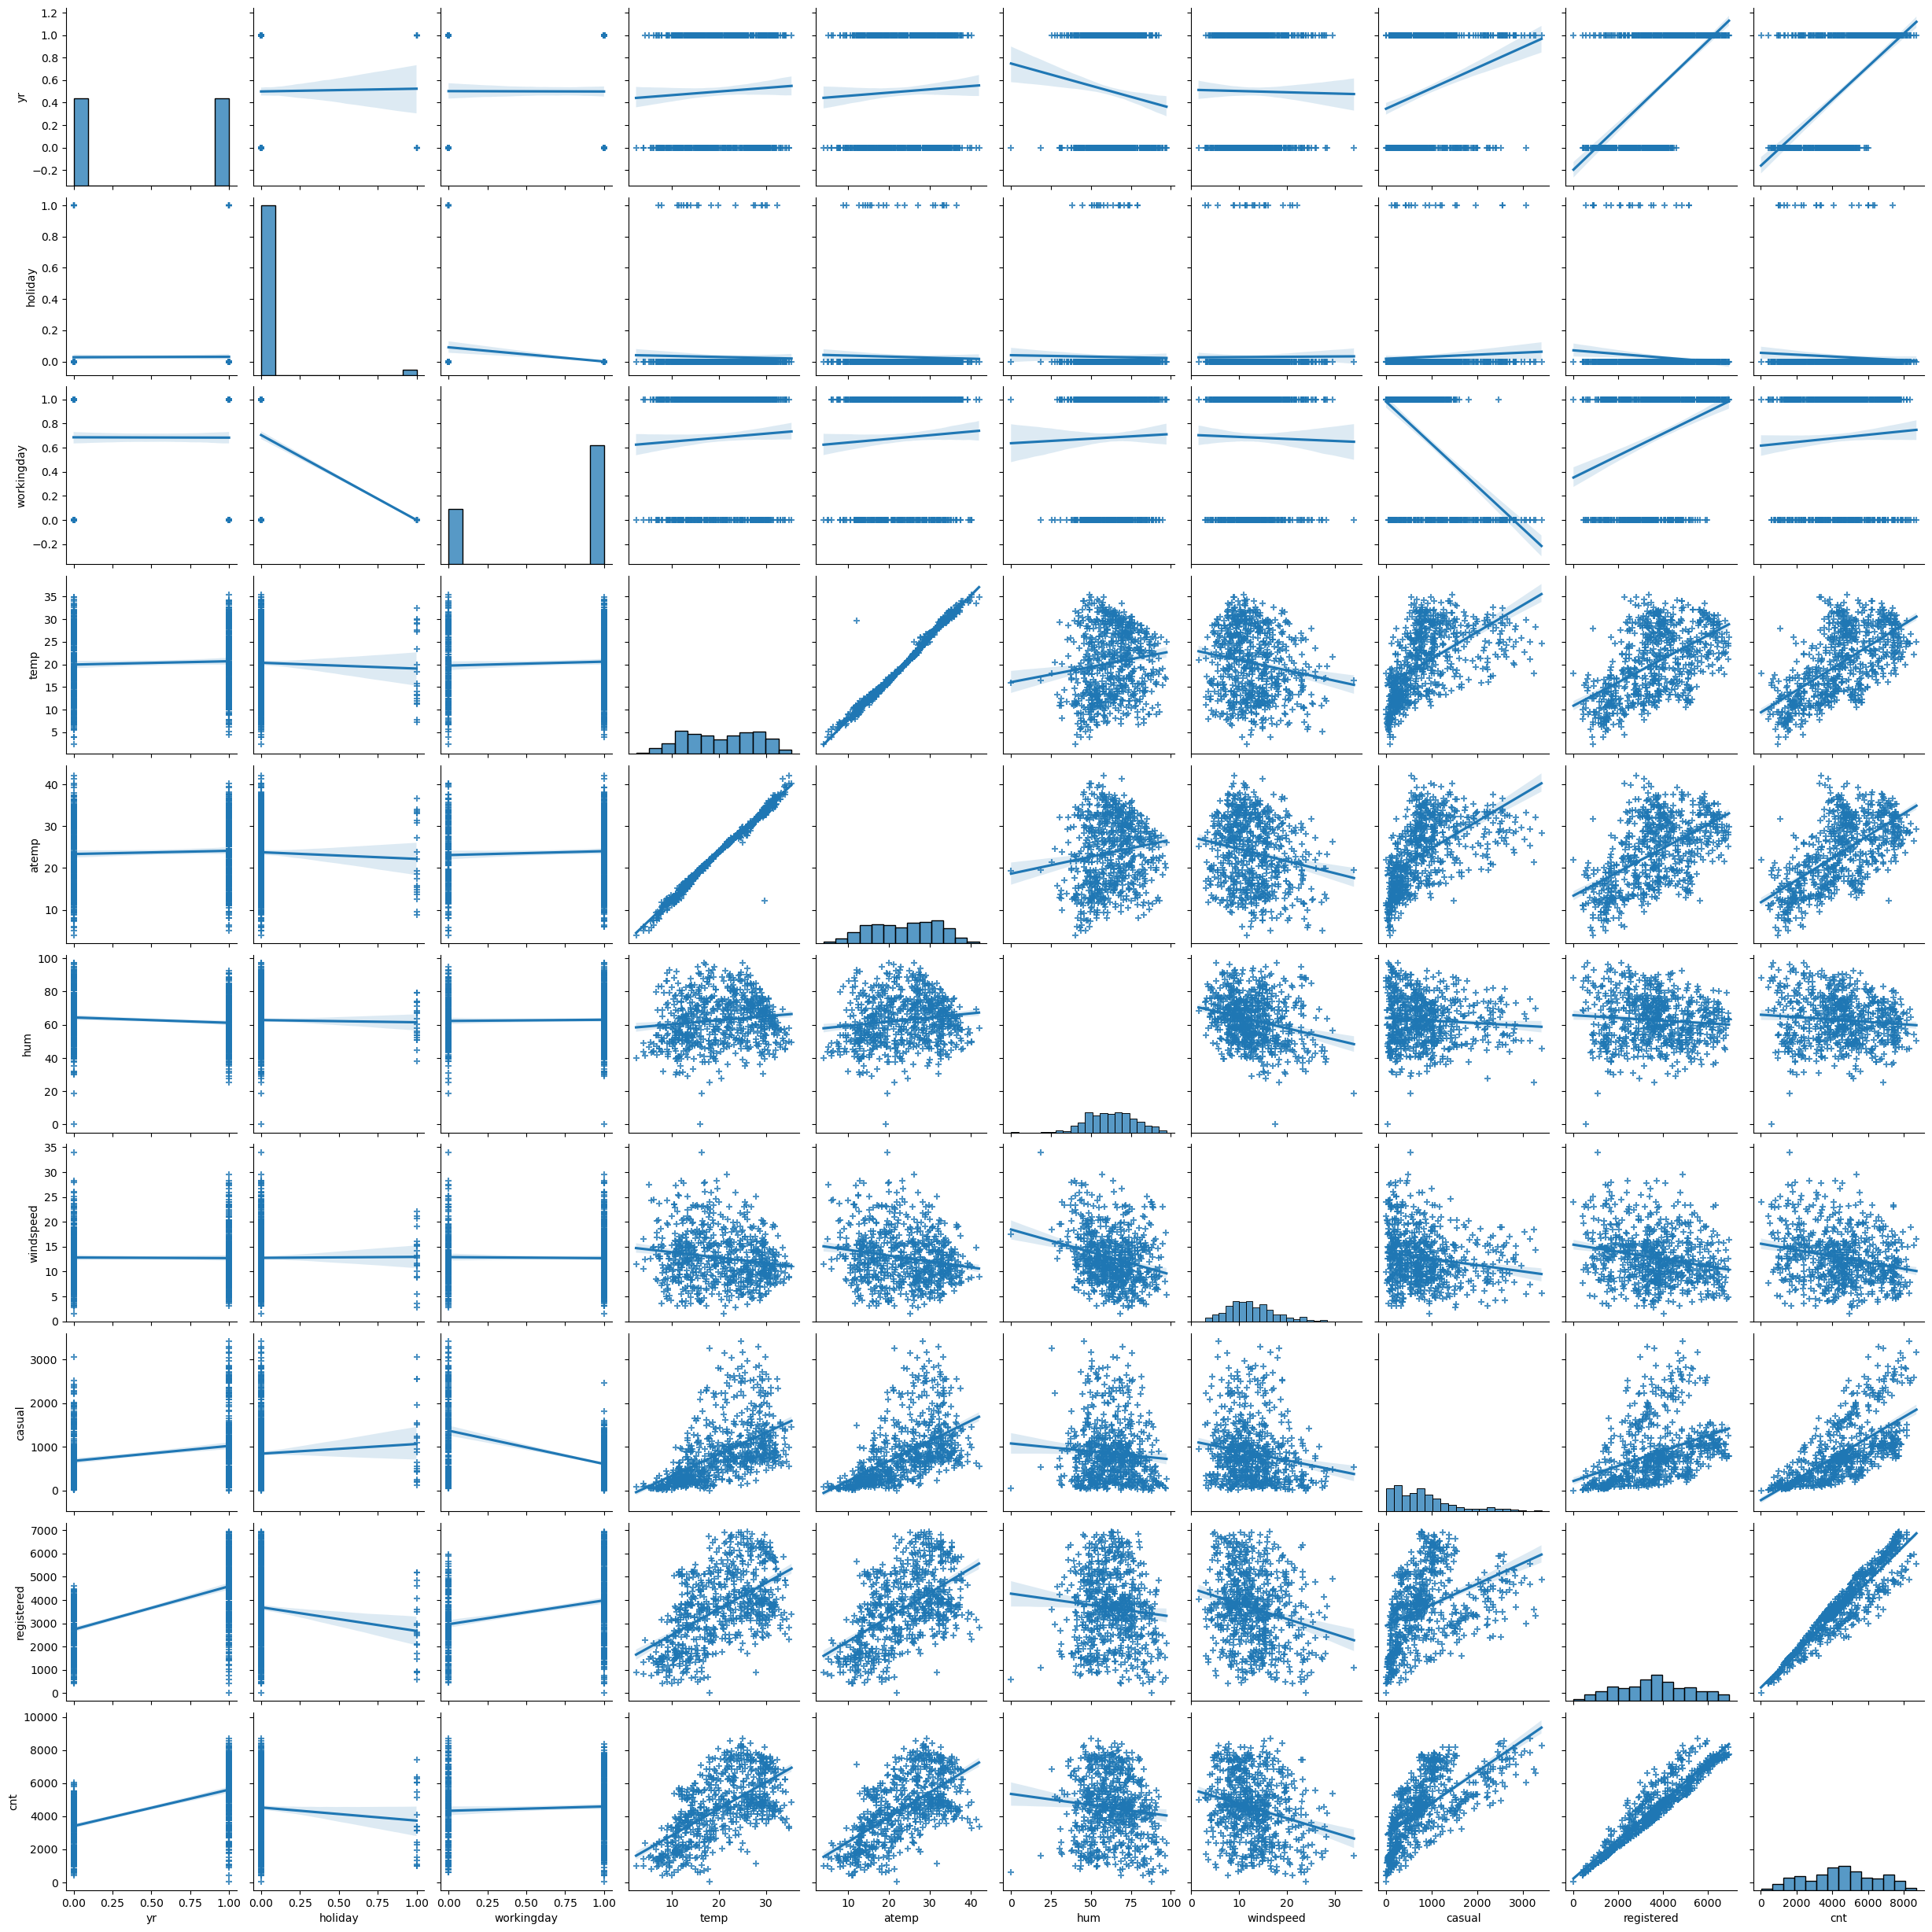

In [82]:

sns.pairplot(boombikes, kind='reg', markers='+', palette='Purples')
plt.show()


In [83]:
content="""<h3>Observations</h3>
<ul style="font-size:15px">
<li style="font-weight:bold">Target Variable:</li>
<li>There is a direct correlation with  temp, atemp, casual and registered.</li>

<li>There is Inverse proportionality with humidity and windspeed
</li>

</ul>
<ul style="font-size:15px">
<li style="font-weight:bold">Independent Variables:</li>
<li>registered shows an inverse correlation with windspeed and hum and strongly correlated with temp and casual
</li>
<li>Casual shows an inversely proportionality to windspeed and hum and directly proportional to temp, atemp, casual, and registered.</li>
<li>Windspeed shows an inversely proportionality to temp, atemp and hum.</li>
<li>Humidity shows a directly proportionality to temp and atemp and inversely proportional to windspeed</li>

</ul>

<h3>Note:</h3>

<p style="font-size:15px">Our target 'cnt' is a summation of 'casual' and 'registered'</p>
<p style="font-size:15px">Above explanation explains the target variable</p>
<p style="font-size:15px; font-weight:bold">DROPPING 'Casual' and 'Registered' columns now</p>

"""
display(Markdown(content))



<h3>Observations</h3>
<ul style="font-size:15px">
<li style="font-weight:bold">Target Variable:</li>
<li>There is a direct correlation with  temp, atemp, casual and registered.</li>

<li>There is Inverse proportionality with humidity and windspeed
</li>

</ul>
<ul style="font-size:15px">
<li style="font-weight:bold">Independent Variables:</li>
<li>registered shows an inverse correlation with windspeed and hum and strongly correlated with temp and casual
</li>
<li>Casual shows an inversely proportionality to windspeed and hum and directly proportional to temp, atemp, casual, and registered.</li>
<li>Windspeed shows an inversely proportionality to temp, atemp and hum.</li>
<li>Humidity shows a directly proportionality to temp and atemp and inversely proportional to windspeed</li>

</ul>

<h3>Note:</h3>

<p style="font-size:15px">Our target 'cnt' is a summation of 'casual' and 'registered'</p>
<p style="font-size:15px">Above explanation explains the target variable</p>
<p style="font-size:15px; font-weight:bold">DROPPING 'Casual' and 'Registered' columns now</p>



In [84]:
boombikes.drop(labels=['casual','registered'], axis = 1, inplace = True)

In [85]:
boombikes.head(2)

season  yr mnth  holiday weekday  workingday        weathersit     temp  \
0  Spring   0  Jan        0     Sat           0  Misty and Cloudy 14.11085   
1  Spring   0  Jan        0     Sun           0  Misty and Cloudy 14.90260   

     atemp      hum  windspeed  cnt  
0 18.18125 80.58330   10.74988  985  
1 17.68695 69.60870   16.65211  801

In [86]:
content="""<h3>#Section 3.3.1: Intervariable relationships using heatmap</h3>"""
display(Markdown(content))

<h3>#Section 3.3.1: Intervariable relationships using heatmap</h3>

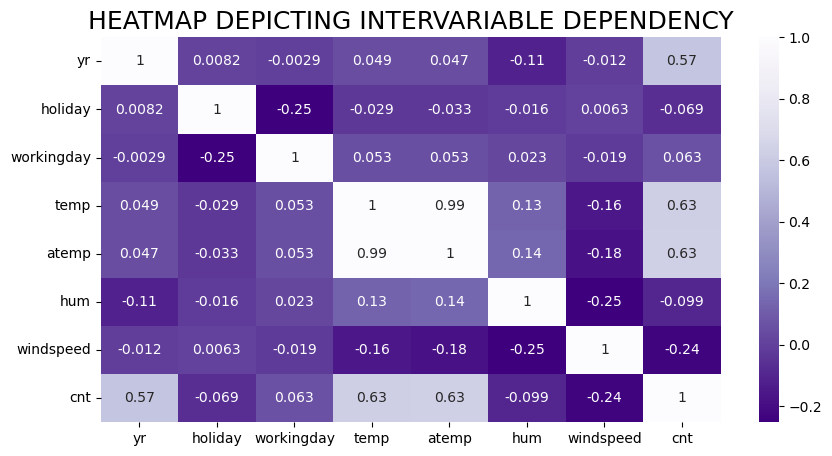

In [87]:
# Select only numeric columns
numeric_columns = boombikes.select_dtypes(include=[np.number])

# Set plot size
plt.figure(figsize=(10,5))

# Plotting Heatmap for numeric columns only
sns.heatmap(numeric_columns.corr(), annot=True, cmap='Purples_r')

# Setting title
plt.title('Heatmap Depicting Intervariable Dependency'.upper(), fontsize=18, y=1)

# Show plot
plt.show()

In [88]:
content="""<h3>Observations</h3>
<ul style="font-size:15px">
<li>The heatmap above reinforces the insights we gained from the previous pairplot analysis.</li>

<li>A very strong correlation between atemp and temp is seen.</li>
</ul>
"""
display(Markdown(content))

<h3>Observations</h3>
<ul style="font-size:15px">
<li>The heatmap above reinforces the insights we gained from the previous pairplot analysis.</li>

<li>A very strong correlation between atemp and temp is seen.</li>
</ul>


In [89]:
content="""<h2>#Section 3.4: Analysis of Growth Over Last Year of 2019</h2>
"""
display(Markdown(content))

<h2>#Section 3.4: Analysis of Growth Over Last Year of 2019</h2>


In [90]:
# Creating fresh dataframe showing monthly demand growth over last year
growth_pd = boombikes.pivot_table(index='mnth', columns='yr', values='cnt', aggfunc ='mean')

# Changing names of the columns
growth_pd.columns=['2018','2019']

# Percent Growth Column
growth_pd['percent growth'] = round(((growth_pd['2019'] - growth_pd['2018'])/ growth_pd['2018'])*100, 2)

# Sorting of dataframe
growth_pd = growth_pd.sort_values(by = 'percent growth', ascending = False)

# Observing the Final Values
growth_pd


2018       2019  percent growth
mnth                                      
Mar  2065.96774 5318.54839       157.44000
Jan  1231.90323 3120.77419       153.33000
Feb  1721.96429 3617.96429       110.11000
Apr  3162.33333 5807.46667        83.64000
Sep  4247.26667 7285.76667        71.54000
Oct  3984.22581 6414.22581        60.99000
Aug  4409.38710 6919.45161        56.93000
Nov  3405.56667 5088.80000        49.43000
May  4381.32258 6318.22581        44.21000
Jul  4559.38710 6567.96774        44.05000
Dec  2816.87097 3990.74194        41.67000
Jun  4783.73333 6761.00000        41.33000

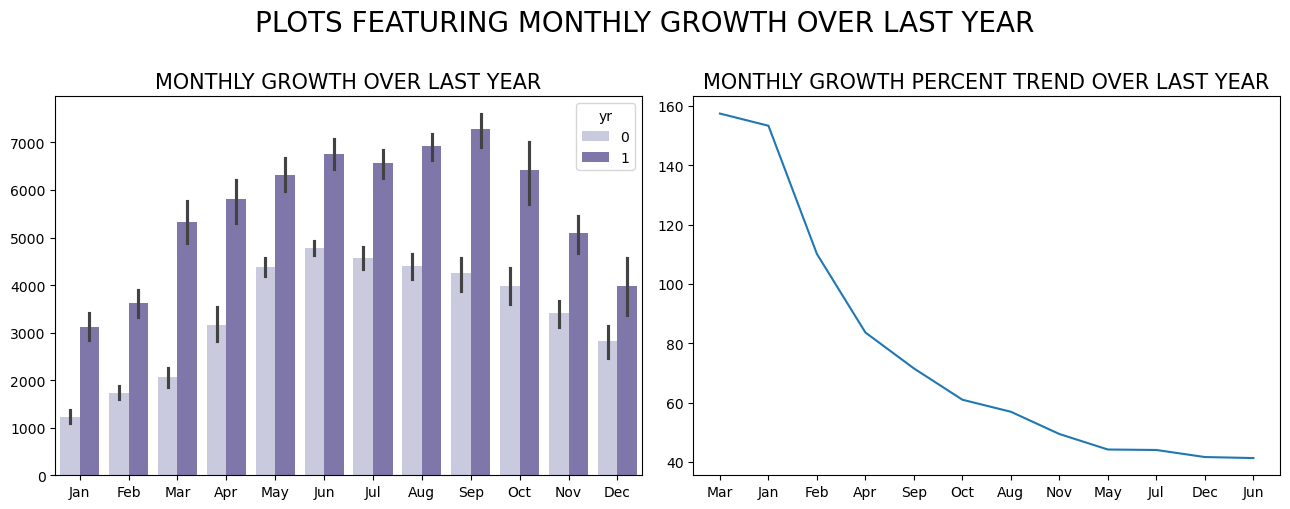

In [91]:
# Creating a subplot grid
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

# The Main Heading
plt.suptitle('Plots featuring monthly Growth Over Last Year'.upper(),
             fontsize=20, fontweight=20, y=1.01)

# Populating plot 1
sns.barplot(x='mnth', y='cnt', data=boombikes, hue='yr', ax=ax[0], palette='Purples')
# Title for each subplot
ax[0].set_title('Monthly Growth Over Last Year'.upper(), fontsize=15)
ax[0].set_ylabel('')  # Remove y-axis labels for cleaner aesthetics
ax[0].set_xlabel('')  # Add a label for the x-axis to clarify

# Populating plot 2
sns.lineplot(x=growth_pd.index, y=growth_pd['percent growth'], ax=ax[1], palette='Purples')
# Title for each subplot
ax[1].set_title('Monthly Growth Percent Trend Over Last Year'.upper(), fontsize=15)
ax[1].set_ylabel('')  # Remove y-axis labels for cleaner aesthetics
ax[1].set_xlabel('')  # Add a label for the x-axis to clarify


# Adjust layout for better readability
plt.tight_layout()
plt.show()

In [92]:
content="""<h3>Observations</h3>
<ul style="font-size:15px">
<li>Outstanding business expansion in 2019 compared to 2018.</li>

<li>Growth of 100+% was noted in January, February, and March.</li>
</ul>
"""
display(Markdown(content))

<h3>Observations</h3>
<ul style="font-size:15px">
<li>Outstanding business expansion in 2019 compared to 2018.</li>

<li>Growth of 100+% was noted in January, February, and March.</li>
</ul>


In [93]:
content="""<h2>#Section 4: Further Model Development Approach</h2>
<h3>Machine Learning Problem</h3>
<ul style="font-size:15px">
<li>In pairplots, the target variable's relationship with "temp," "atemp," "humidity," and "windspeed" was discovered.</li>
<li>As seen in previous barplots, the target variable was shown to be linked with date, work_stat, season, and month.</li>
<li>The output above demonstrates that this is a machine learning challenge because the result is based on independent features and past data.</li>
</ul>
<h3>Supervised vs Unsupervised</h3>
<ul style="font-size:15px">
<li>It is a supervised learning problem as we have a target variable.</li>
</ul>

<h3>Regression</h3>
<ul style="font-size:15px">
<li>This problem is classified as a regression problem since the target variable (cnt) is continuous.</li>
</ul>
<h3>Multiple Independent Features</h3>
<ul style="font-size:15px">
<li>We now know from the provided EDA that the target variable depends on a number of characteristics. This problem is therefore eligible to be classified as a multiple linear regression problem.</li>
</ul>
"""
display(Markdown(content))

<h2>#Section 4: Further Model Development Approach</h2>
<h3>Machine Learning Problem</h3>
<ul style="font-size:15px">
<li>In pairplots, the target variable's relationship with "temp," "atemp," "humidity," and "windspeed" was discovered.</li>
<li>As seen in previous barplots, the target variable was shown to be linked with date, work_stat, season, and month.</li>
<li>The output above demonstrates that this is a machine learning challenge because the result is based on independent features and past data.</li>
</ul>
<h3>Supervised vs Unsupervised</h3>
<ul style="font-size:15px">
<li>It is a supervised learning problem as we have a target variable.</li>
</ul>

<h3>Regression</h3>
<ul style="font-size:15px">
<li>This problem is classified as a regression problem since the target variable (cnt) is continuous.</li>
</ul>
<h3>Multiple Independent Features</h3>
<ul style="font-size:15px">
<li>We now know from the provided EDA that the target variable depends on a number of characteristics. This problem is therefore eligible to be classified as a multiple linear regression problem.</li>
</ul>


In [94]:
content="""<h1>#Section 5: Developing the Model using Multiple Linear Regression</h1>"""
display(Markdown(content))

<h1>#Section 5: Developing the Model using Multiple Linear Regression</h1>

In [95]:
# Re-examining the Data
boombikes.head()

season  yr mnth  holiday weekday  workingday              weathersit  \
0  Spring   0  Jan        0     Sat           0        Misty and Cloudy   
1  Spring   0  Jan        0     Sun           0        Misty and Cloudy   
2  Spring   0  Jan        0     Mon           1  Clear to Partly Cloudy   
3  Spring   0  Jan        0     Tue           1  Clear to Partly Cloudy   
4  Spring   0  Jan        0     Wed           1  Clear to Partly Cloudy   

      temp    atemp      hum  windspeed   cnt  
0 14.11085 18.18125 80.58330   10.74988   985  
1 14.90260 17.68695 69.60870   16.65211   801  
2  8.05092  9.47025 43.72730   16.63670  1349  
3  8.20000 10.60610 59.04350   10.73983  1562  
4  9.30524 11.46350 43.69570   12.52230  1600

In [96]:
content="""<h3>Observations</h3>
<ul style="font-size:15px">
<li>Column 'yr', 'holiday', 'workingday' are Binary Variables</li>
</ul>
"""
display(Markdown(content))

<h3>Observations</h3>
<ul style="font-size:15px">
<li>Column 'yr', 'holiday', 'workingday' are Binary Variables</li>
</ul>


In [97]:
content="""<h2>#Section 5.1: Dummy Variables</h2>
"""
display(Markdown(content))

<h2>#Section 5.1: Dummy Variables</h2>


In [98]:
# Creation of a new dataframe for ML algorithm (Deep copy of boombikes):
boombikes_ml = boombikes.copy()

In [99]:
# Creating a list of features that need to be converted to dummy variables:

dummy_list = [i for i in boombikes_ml.select_dtypes(include= 'object').columns]

# Creating Dummies

for i in dummy_list:
	my_d = pd.get_dummies(data= boombikes_ml[i], drop_first=True)
	boombikes_ml = pd.concat([boombikes_ml, my_d], axis= 1).drop(labels= i, axis = 1)

In [100]:
# Re-examining the Data frame
boombikes_ml.head()

yr  holiday  workingday     temp    atemp      hum  windspeed   cnt  \
0   0        0           0 14.11085 18.18125 80.58330   10.74988   985   
1   0        0           0 14.90260 17.68695 69.60870   16.65211   801   
2   0        0           1  8.05092  9.47025 43.72730   16.63670  1349   
3   0        0           1  8.20000 10.60610 59.04350   10.73983  1562   
4   0        0           1  9.30524 11.46350 43.69570   12.52230  1600   

   Spring  Summer  ...    Oct    Sep    Mon    Sat    Sun    Thu    Tue  \
0    True   False  ...  False  False  False   True  False  False  False   
1    True   False  ...  False  False  False  False   True  False  False   
2    True   False  ...  False  False   True  False  False  False  False   
3    True   False  ...  False  False  False  False  False  False   True   
4    True   False  ...  False  False  False  False  False  False  False   

     Wed  Light Rain or Snow  Misty and Cloudy  
0  False               False              True  
1  False               False              True  
2  False               False             False  
3  False               False             False  
4   True               False             False  

[5 rows x 30 columns]

In [101]:
print(f'Our new dataset post dummy var creation has {boombikes_ml.shape[0]} rows and {boombikes_ml.shape[1]} columns.')

Our new dataset post dummy var creation has 730 rows and 30 columns.


In [102]:
content="""<h2>#Section 5.2: Intervariable Interactions</h2>
<h3>#Section 5.2.1: Heatmap</h3>
"""
display(Markdown(content))

<h2>#Section 5.2: Intervariable Interactions</h2>
<h3>#Section 5.2.1: Heatmap</h3>


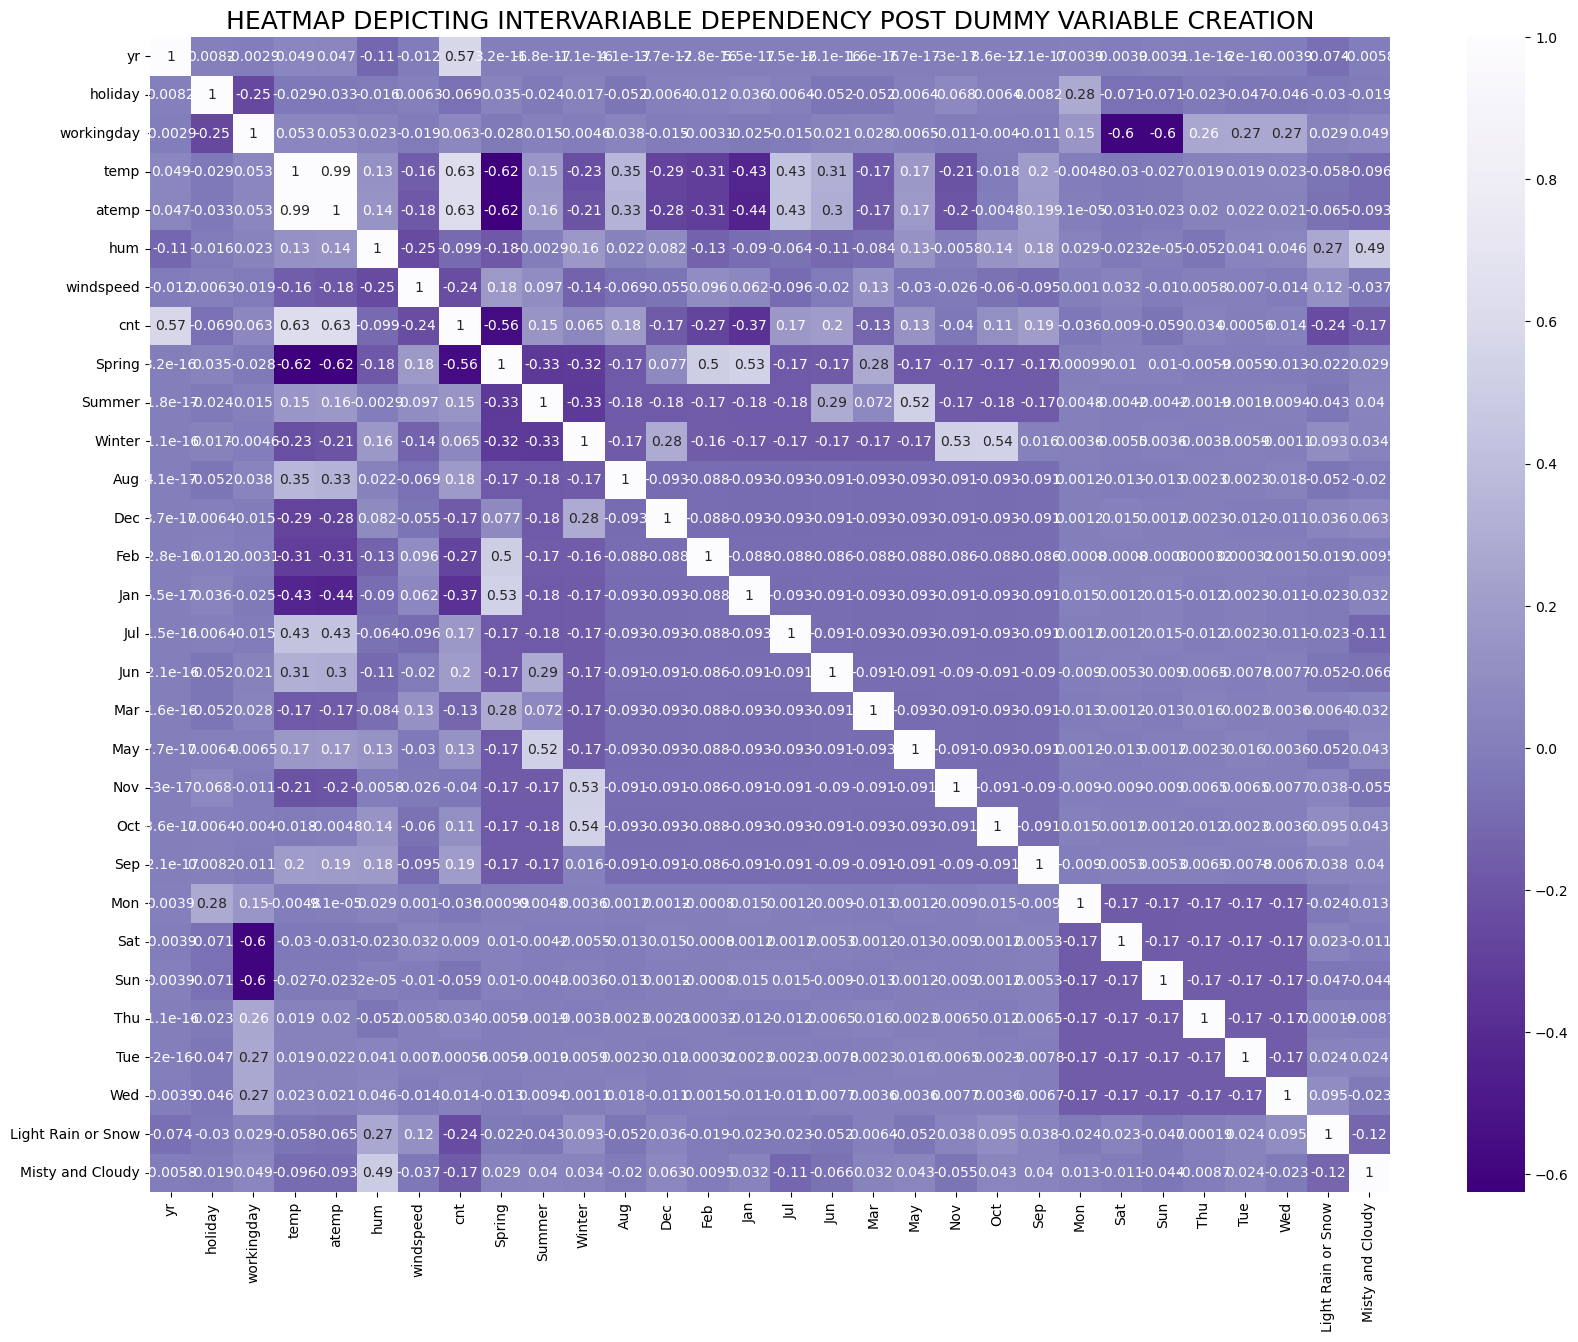

In [103]:
# Select only numeric columns
numeric_columns = boombikes.select_dtypes(include=[np.number])
# Re-plotting the Heatmap

# Set plot size
plt.figure(figsize=(20,15))

# Plotting Heatmap for numeric columns only
sns.heatmap(boombikes_ml.corr(), annot=True, cmap='Purples_r')

# Setting title
plt.title('Heatmap Depicting Intervariable Dependency Post Dummy Variable Creation'.upper(), fontsize=18, y=1)

# Show plot
plt.show()

In [104]:
content="""<h3>Note:</h3>
<ul style="font-size:15px">
<li>Because of the large number of variables and the limited display space, the heatmap has turned to be extremely thick.</li>
<li>The dataframe that follows will show a significant degree of both positive and negative correlation.</li>
"""
display(Markdown(content))

<h3>Note:</h3>
<ul style="font-size:15px">
<li>Because of the large number of variables and the limited display space, the heatmap has turned to be extremely thick.</li>
<li>The dataframe that follows will show a significant degree of both positive and negative correlation.</li>


In [105]:
content="""<h3>#Section 5.2.2: Dataframe highlighting Intervariable Relationships</h3>"""
display(Markdown(content))

<h3>#Section 5.2.2: Dataframe highlighting Intervariable Relationships</h3>

In [106]:
# Initiating Variables:

col_list = []
ind_list = []
corr_type = []
corr_strength = []
corr_list = []

# Developing Loop

for i in range(len(boombikes_ml.corr().columns)):
	for j in range(len(boombikes_ml.corr().index)):

		if boombikes_ml.corr().columns[i] != boombikes_ml.corr().index[j] and boombikes_ml.corr().iloc[i,j] != 0:

			if boombikes_ml.corr().iloc[i,j] < 0:

				if boombikes_ml.corr().iloc[i,j] <= -0.7:
					col_list.append(boombikes_ml.corr().columns[i])
					ind_list.append(boombikes_ml.corr().index[j])
					corr_type.append('Negative')
					corr_strength.append('Strong')
					corr_list.append(round(boombikes_ml.corr().iloc[i,j],2))
				
				elif boombikes_ml.corr().iloc[i,j] < -0.3:
					col_list.append(boombikes_ml.corr().columns[i])
					ind_list.append(boombikes_ml.corr().index[j])
					corr_type.append('Negative')
					corr_strength.append('Medium')
					corr_list.append(round(boombikes_ml.corr().iloc[i,j],2))
			
			else:

				if boombikes_ml.corr().iloc[i,j] >= 0.7:
					col_list.append(boombikes_ml.corr().columns[i])
					ind_list.append(boombikes_ml.corr().index[j])
					corr_type.append('Positive')
					corr_strength.append('Strong')
					corr_list.append(round(boombikes_ml.corr().iloc[i,j],2))
					
				
				elif boombikes_ml.corr().iloc[i,j] > 0.3:
					col_list.append(boombikes_ml.corr().columns[i])
					ind_list.append(boombikes_ml.corr().index[j])
					corr_type.append('Positive')
					corr_strength.append('Strong')
					corr_list.append(round(boombikes_ml.corr().iloc[i,j],2))

In [107]:
# New Dataframe initialized to show Intervariable Relationships

boombike_corr_df = pd.DataFrame({'Column1': col_list, 'Column2': ind_list, 'Relationship Strength': corr_strength, 'Relation Type': corr_type, 'Correlation C': corr_list})

# Inspecting the Data Frame
boombike_corr_df

Column1           Column2 Relationship Strength Relation Type  \
0                 yr               cnt                Strong      Positive   
1         workingday               Sat                Medium      Negative   
2         workingday               Sun                Medium      Negative   
3               temp             atemp                Strong      Positive   
4               temp               cnt                Strong      Positive   
5               temp            Spring                Medium      Negative   
6               temp               Aug                Strong      Positive   
7               temp               Feb                Medium      Negative   
8               temp               Jan                Medium      Negative   
9               temp               Jul                Strong      Positive   
10              temp               Jun                Strong      Positive   
11             atemp              temp                Strong      Positive   
12             atemp               cnt                Strong      Positive   
13             atemp            Spring                Medium      Negative   
14             atemp               Aug                Strong      Positive   
15             atemp               Feb                Medium      Negative   
16             atemp               Jan                Medium      Negative   
17             atemp               Jul                Strong      Positive   
18             atemp               Jun                Strong      Positive   
19               hum  Misty and Cloudy                Strong      Positive   
20               cnt                yr                Strong      Positive   
21               cnt              temp                Strong      Positive   
22               cnt             atemp                Strong      Positive   
23               cnt            Spring                Medium      Negative   
24               cnt               Jan                Medium      Negative   
25            Spring              temp                Medium      Negative   
26            Spring             atemp                Medium      Negative   
27            Spring               cnt                Medium      Negative   
28            Spring            Summer                Medium      Negative   
29            Spring            Winter                Medium      Negative   
30            Spring               Feb                Strong      Positive   
31            Spring               Jan                Strong      Positive   
32            Summer            Spring                Medium      Negative   
33            Summer            Winter                Medium      Negative   
34            Summer               May                Strong      Positive   
35            Winter            Spring                Medium      Negative   
36            Winter            Summer                Medium      Negative   
37            Winter               Nov                Strong      Positive   
38            Winter               Oct                Strong      Positive   
39               Aug              temp                Strong      Positive   
40               Aug             atemp                Strong      Positive   
41               Feb              temp                Medium      Negative   
42               Feb             atemp                Medium      Negative   
43               Feb            Spring                Strong      Positive   
44               Jan              temp                Medium      Negative   
45               Jan             atemp                Medium      Negative   
46               Jan               cnt                Medium      Negative   
47               Jan            Spring                Strong      Positive   
48               Jul              temp                Strong      Positive   
49               Jul             atemp                Strong      Positive   
50               Jun              t

In [108]:
content="""<h3>Observations:</h3>
<ul style="font-size:15px">
<li>Above table clearly shows the correlation where the variables are correlated.</li>
</ul>
<h3>Note:</h3>
<ul style="font-size:15px">
    <li>The degree and strength of association was taken as:</li>
	<li>If correlation between variable pairs is between 0.3 to 0.7: Medium Positive Correlation</li>
	<li>If correlation between variable pairs is > 0.7: Strong Positive Correlation</li>
	<li>If correlation between variable pairs is between -0.3 to -0.7: Medium Negative Correlation</li>
	<li>If correlation between variable pairs is < -0.7: Strong Negative Correlation</li>
</ul>    
"""
display(Markdown(content))

<h3>Observations:</h3>
<ul style="font-size:15px">
<li>Above table clearly shows the correlation where the variables are correlated.</li>
</ul>
<h3>Note:</h3>
<ul style="font-size:15px">
    <li>The degree and strength of association was taken as:</li>
	<li>If correlation between variable pairs is between 0.3 to 0.7: Medium Positive Correlation</li>
	<li>If correlation between variable pairs is > 0.7: Strong Positive Correlation</li>
	<li>If correlation between variable pairs is between -0.3 to -0.7: Medium Negative Correlation</li>
	<li>If correlation between variable pairs is < -0.7: Strong Negative Correlation</li>
</ul>    


In [109]:
# Displaying feature combination of strong positive correlation

boombike_corr_df[(boombike_corr_df['Relationship Strength'] == 'Strong') 
& (boombike_corr_df['Relation Type']== 'Positive')].sort_values(by = 'Correlation C', ascending = False)


Column1           Column2 Relationship Strength Relation Type  \
11             atemp              temp                Strong      Positive   
3               temp             atemp                Strong      Positive   
21               cnt              temp                Strong      Positive   
4               temp               cnt                Strong      Positive   
12             atemp               cnt                Strong      Positive   
22               cnt             atemp                Strong      Positive   
0                 yr               cnt                Strong      Positive   
20               cnt                yr                Strong      Positive   
54               Oct            Winter                Strong      Positive   
38            Winter               Oct                Strong      Positive   
53               Nov            Winter                Strong      Positive   
47               Jan            Spring                Strong      Positive   
37            Winter               Nov                Strong      Positive   
31            Spring               Jan                Strong      Positive   
52               May            Summer                Strong      Positive   
34            Summer               May                Strong      Positive   
43               Feb            Spring                Strong      Positive   
30            Spring               Feb                Strong      Positive   
19               hum  Misty and Cloudy                Strong      Positive   
57  Misty and Cloudy               hum                Strong      Positive   
17             atemp               Jul                Strong      Positive   
48               Jul              temp                Strong      Positive   
49               Jul             atemp                Strong      Positive   
9               temp               Jul                Strong      Positive   
39               Aug              temp                Strong      Positive   
6               temp               Aug                Strong      Positive   
40               Aug             atemp                Strong      Positive   
14             atemp               Aug                Strong      Positive   
50               Jun              temp                Strong      Positive   
10              temp               Jun                Strong      Positive   
51               Jun             atemp                Strong      Positive   
18             atemp               Jun                Strong      Positive   

    Correlation C  
11        0.99000  
3         0.99000  
21        0.63000  
4         0.63000  
12        0.63000  
22        0.63000  
0         0.57000  
20        0.57000  
54        0.54000  
38        0.54000  
53        0.53000  
47        0.53000  
37        0.53000  
31        0.53000  
52        0.52000  
34        0.52000  
43        0.50000  
30        0.50000  
19        0.49000  
57        0.49000  
17        0.43000  
48        0.43000  
49        0.43000  
9         0.43000  
39        0.35000  
6         0.35000  
40        0.33000  
14        0.33000  
50        0.31000  
10        0.31000  
51        0.30000  
18        0.30000

In [110]:
content="""<h3>Observations:</h3>
<ul style="font-size:15px">
<li>32 pairs in all exhibit a high degree of positive correlation.</li>
<li>Since each pair is repeated twice, there are 16 pairs of variables that exhibit a high degree of correlation.</li>
</ul>

"""
display(Markdown(content))

<h3>Observations:</h3>
<ul style="font-size:15px">
<li>32 pairs in all exhibit a high degree of positive correlation.</li>
<li>Since each pair is repeated twice, there are 16 pairs of variables that exhibit a high degree of correlation.</li>
</ul>



In [111]:
# Displaying feature combination of strong negative correlation

boombike_corr_df[(boombike_corr_df['Relationship Strength'] == 'Strong') 
& (boombike_corr_df['Relation Type']== 'Negative')].sort_values(by = 'Correlation C')

Empty DataFrame
Columns: [Column1, Column2, Relationship Strength, Relation Type, Correlation C]
Index: []

In [112]:
content="""<h3>Observations:</h3>
<ul style="font-size:15px">
<li>No variable pairs found for negative correlation.</li>
</ul>

"""
display(Markdown(content))

<h3>Observations:</h3>
<ul style="font-size:15px">
<li>No variable pairs found for negative correlation.</li>
</ul>



In [113]:
content="""<h2>#Section 5.3: Train Test Spilt</h2>
"""
display(Markdown(content))

<h2>#Section 5.3: Train Test Spilt</h2>


In [114]:
content="""<h3>Dividing the data in 2 distinct datasets:</h3>
<ul style="font-size:15px">
<li>bb_train: This dataset will be used in training the model to learn the coefficients.</li>
<li>bb_test: This dataset will largely remain 'unknown' to our model and will be used in the end to test the model property.</li>
</ul>

"""
display(Markdown(content))

<h3>Dividing the data in 2 distinct datasets:</h3>
<ul style="font-size:15px">
<li>bb_train: This dataset will be used in training the model to learn the coefficients.</li>
<li>bb_test: This dataset will largely remain 'unknown' to our model and will be used in the end to test the model property.</li>
</ul>



In [115]:
boombikes_ml.head()

yr  holiday  workingday     temp    atemp      hum  windspeed   cnt  \
0   0        0           0 14.11085 18.18125 80.58330   10.74988   985   
1   0        0           0 14.90260 17.68695 69.60870   16.65211   801   
2   0        0           1  8.05092  9.47025 43.72730   16.63670  1349   
3   0        0           1  8.20000 10.60610 59.04350   10.73983  1562   
4   0        0           1  9.30524 11.46350 43.69570   12.52230  1600   

   Spring  Summer  ...    Oct    Sep    Mon    Sat    Sun    Thu    Tue  \
0    True   False  ...  False  False  False   True  False  False  False   
1    True   False  ...  False  False  False  False   True  False  False   
2    True   False  ...  False  False   True  False  False  False  False   
3    True   False  ...  False  False  False  False  False  False   True   
4    True   False  ...  False  False  False  False  False  False  False   

     Wed  Light Rain or Snow  Misty and Cloudy  
0  False               False              True  
1  False               False              True  
2  False               False             False  
3  False               False             False  
4   True               False             False  

[5 rows x 30 columns]

In [116]:
# Initializing bb_train, bb_test:
bb_train, bb_test = train_test_split(boombikes_ml, test_size = 0.30, random_state = 100)

In [117]:
print(f'Training set:{bb_train.shape}')
print(f'Test set:{bb_test.shape}')

Training set:(511, 30)
Test set:(219, 30)


In [118]:
content="""<h3>Dividing the data in 2 distinct datasets:</h3>
<ul style="font-size:15px">
<li>The sum of the rows in the train and test sets equals precisely 730, which is the same as the number of rows in our boombikes_ml dataset. As a result, test and train rows have been appropriately separated.
</li>
<li>There are 27, which corresponds to the number of columns in our boombikes_ml dataset.</li>
</ul>

"""
display(Markdown(content))


<h3>Dividing the data in 2 distinct datasets:</h3>
<ul style="font-size:15px">
<li>The sum of the rows in the train and test sets equals precisely 730, which is the same as the number of rows in our boombikes_ml dataset. As a result, test and train rows have been appropriately separated.
</li>
<li>There are 27, which corresponds to the number of columns in our boombikes_ml dataset.</li>
</ul>



In [119]:
# Visual inspection
bb_train.sample(5)

yr  holiday  workingday     temp    atemp      hum  windspeed   cnt  \
214   0        0           1 29.99835 33.99685 65.75000    9.08406  3574   
141   0        0           0 24.77085 28.72500 74.95830    9.91654  4660   
406   1        0           0  9.19085 10.54335 73.12500   19.41633  2169   
385   1        0           0  7.10665  8.74375 83.12500   14.91701  1301   
273   0        0           0 16.81000 20.64315 75.37500   19.58383  2429   

     Spring  Summer  ...    Oct    Sep    Mon    Sat    Sun    Thu    Tue  \
214   False   False  ...  False  False  False  False  False  False  False   
141   False    True  ...  False  False  False  False   True  False  False   
406    True   False  ...  False  False  False   True  False  False  False   
385    True   False  ...  False  False  False   True  False  False  False   
273   False   False  ...   True  False  False   True  False  False  False   

       Wed  Light Rain or Snow  Misty and Cloudy  
214   True               False              True  
141  False               False             False  
406  False                True             False  
385  False               False              True  
273  False               False              True  

[5 rows x 30 columns]

In [120]:
content="""<h2>#Section 5.4: Rescaling of Data</h2>
"""
display(Markdown(content))

<h2>#Section 5.4: Rescaling of Data</h2>


In [121]:
# Creatiion of a Scaler Instance
scaler = MinMaxScaler()

In [122]:
# Initializing a list of feature names for scaling
scaler_list = [i for i in bb_train.columns if bb_train[i].nunique()>2]

# Scaling of the variables and saving in our dataframe:
bb_train[scaler_list] = scaler.fit_transform(bb_train[scaler_list])

In [123]:
# Inspecting bb_train:
bb_train.head()

yr  holiday  workingday    temp   atemp     hum  windspeed     cnt  \
653   1        0           1 0.50989 0.50113 0.57535    0.30079 0.86424   
576   1        0           1 0.81517 0.76635 0.72563    0.26469 0.82766   
426   1        0           0 0.44239 0.43897 0.64019    0.25534 0.46526   
728   1        0           0 0.24510 0.20035 0.49807    0.66311 0.20410   
482   1        0           0 0.39567 0.39174 0.50451    0.18847 0.48297   

     Spring  Summer  ...    Oct    Sep    Mon    Sat    Sun    Thu    Tue  \
653   False   False  ...   True  False  False  False  False  False   True   
576   False   False  ...  False  False  False  False  False  False   True   
426    True   False  ...  False  False  False   True  False  False  False   
728    True   False  ...  False  False  False  False   True  False  False   
482   False    True  ...  False  False  False   True  False  False  False   

       Wed  Light Rain or Snow  Misty and Cloudy  
653  False               False             False  
576  False               False             False  
426  False               False              True  
728  False               False             False  
482  False               False              True  

[5 rows x 30 columns]

In [209]:
content="""<h2>#Section 5.5: Splitting Dataset in X and Y</h2>"""
display(Markdown(content))

<h2>#Section 5.5: Splitting Dataset in X and Y</h2>

In [125]:
# Splitting of Dataset in X and Y

y_train = bb_train.pop('cnt')
x_train = bb_train

In [126]:
# Inspecting shapes of X_train and y_train
print(f'x_train shape:{x_train.shape}, y_train shape:{y_train.shape}')

x_train shape:(511, 29), y_train shape:(511,)


In [210]:
content="""<h3>Observations:</h3>
<ul style="font-size:15px">
<li>The data has been appropriately divided into two sets, x_train and y_train, each of which comprises 511 rows, 26 columns, and one column, respectively.</li>
</ul>
"""
display(Markdown(content))

<h3>Observations:</h3>
<ul style="font-size:15px">
<li>The data has been appropriately divided into two sets, x_train and y_train, each of which comprises 511 rows, 26 columns, and one column, respectively.</li>
</ul>


In [128]:
x_train.head(2)

yr  holiday  workingday    temp   atemp     hum  windspeed  Spring  \
653   1        0           1 0.50989 0.50113 0.57535    0.30079   False   
576   1        0           1 0.81517 0.76635 0.72563    0.26469   False   

     Summer  Winter  ...    Oct    Sep    Mon    Sat    Sun    Thu   Tue  \
653   False    True  ...   True  False  False  False  False  False  True   
576   False   False  ...  False  False  False  False  False  False  True   

       Wed  Light Rain or Snow  Misty and Cloudy  
653  False               False             False  
576  False               False             False  

[2 rows x 29 columns]

In [129]:
y_train.head(2)

653   0.86424
576   0.82766
Name: cnt, dtype: float64

In [130]:
content="""<h2>#Section 5.6: Model Development</h2>
"""
display(Markdown(content))

<h2>#Section 5.6: Model Development</h2>


In [131]:
content="""<h3>Based on the case study requirements, the below feature selection will be used:</h3>
<ul style="font-size:15px">
<li>Automated Selection: For automatic model selection in the first phase, I'll employ Recursive Feature Selection, or RFE. The researcher will specifically tell the RFE function to have the number of features in the given dataset depending on their importance rating, in accordance with industry practice.</li>
<li>Manual Selection: I will use a manual strategy to refine the feature selection after automatic selection, drawing on my intuition and information from external desk research.</li>
</ul>

"""
display(Markdown(content))

<h3>Based on the case study requirements, the below feature selection will be used:</h3>
<ul style="font-size:15px">
<li>Automated Selection: For automatic model selection in the first phase, I'll employ Recursive Feature Selection, or RFE. The researcher will specifically tell the RFE function to have the number of features in the given dataset depending on their importance rating, in accordance with industry practice.</li>
<li>Manual Selection: I will use a manual strategy to refine the feature selection after automatic selection, drawing on my intuition and information from external desk research.</li>
</ul>



In [132]:
content="""<h3>#Section 5.6.1: Recursive Feature Elimination (RFE)</h3>"""
display(Markdown(content))

<h3>#Section 5.6.1: Recursive Feature Elimination (RFE)</h3>

In [133]:
# Initializing the Linear Regression model
lm = LinearRegression()

# Fitting the linear regression model to the training data (x_train and y_train)
lm.fit(x_train, y_train)

# Initializing the RFE method to select the top 15 features
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fitting the RFE method to the training data to select the most important 15 features
rfe = rfe.fit(x_train, y_train)

In [134]:
# Using zip to combine column names from x_train, the selected features (True/False), and the ranking of each feature
# rfe.support_ returns a boolean array where True indicates the feature is selected
# rfe.ranking_ gives the rank of each feature, with 1 being the most important and higher numbers indicating lower importance

list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 15),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 7),
 ('Thu', False, 11),
 ('Tue', False, 9),
 ('Wed', False, 12),
 ('Light Rain or Snow', True, 1),
 ('Misty and Cloudy', True, 1)]

In [135]:
content="""<h3>Observations:</h3>
<ul style="font-size:15px">
<li>The RFE function's recommendations to keep the top 15 features are displayed in the results above.</li>
<li>Due to the industrial practice of accounting for half of the variables when running the RFE function, the researcher arrived at 15 as preserved characteristics.</li>
<li>RFE recommends adding a feature to the model whenever the Boolean given by rfe.supprt_ is True.</li>
</ul>

"""
display(Markdown(content))

<h3>Observations:</h3>
<ul style="font-size:15px">
<li>The RFE function's recommendations to keep the top 15 features are displayed in the results above.</li>
<li>Due to the industrial practice of accounting for half of the variables when running the RFE function, the researcher arrived at 15 as preserved characteristics.</li>
<li>RFE recommends adding a feature to the model whenever the Boolean given by rfe.supprt_ is True.</li>
</ul>



In [136]:
content="""<h3>15 of the train dataset's index columns were extracted using the results above.</h3>
"""
display(Markdown(content))

<h3>15 of the train dataset's index columns were extracted using the results above.</h3>


In [137]:
# Creating an empty DataFrame to store the selected feature information
temp_rfe_df = pd.DataFrame()

# Add the column names of the x_train DataFrame as a new column 'col' in the temp_rfe_df
temp_rfe_df['col'] = x_train.columns

# Add the support information from the RFE (Recursive Feature Elimination) results as a new column
# 'RFE_Support' will indicate whether each feature is selected (True) or not (False)
temp_rfe_df['RFE_Support'] = rfe.support_

# Filter the DataFrame to keep only rows where the RFE_Support is True (i.e., selected features)
temp_rfe_df = temp_rfe_df[temp_rfe_df['RFE_Support'] == True]

# Return the filtered DataFrame (which should only contain the selected features)
temp_rfe_df

col  RFE_Support
0                   yr         True
1              holiday         True
2           workingday         True
3                 temp         True
5                  hum         True
6            windspeed         True
7               Spring         True
8               Summer         True
9               Winter         True
13                 Jan         True
14                 Jul         True
20                 Sep         True
22                 Sat         True
27  Light Rain or Snow         True
28    Misty and Cloudy         True

In [138]:
# Creating a list of column names that were selected in the previous step ('Col' contains the feature names)
my_cols = [i for i in temp_rfe_df['col']]

# Use the selected columns (my_cols) to filter the x_train DataFrame and display the first few rows
x_train[my_cols].head()

yr  holiday  workingday    temp     hum  windspeed  Spring  Summer  \
653   1        0           1 0.50989 0.57535    0.30079   False   False   
576   1        0           1 0.81517 0.72563    0.26469   False   False   
426   1        0           0 0.44239 0.64019    0.25534    True   False   
728   1        0           0 0.24510 0.49807    0.66311    True   False   
482   1        0           0 0.39567 0.50451    0.18847   False    True   

     Winter    Jan    Jul    Sep    Sat  Light Rain or Snow  Misty and Cloudy  
653    True  False  False  False  False               False             False  
576   False  False   True  False  False               False             False  
426   False  False  False  False   True               False              True  
728   False  False  False  False  False               False             False  
482   False  False  False  False   True               False              True

In [139]:
print(temp_rfe_df.columns)

Index(['col', 'RFE_Support'], dtype='object')


In [140]:
print(f'Final dataframe for model training has {x_train[my_cols].shape[0]} rows and {x_train[my_cols].shape[1]} columns.')

Final dataframe for model training has 511 rows and 15 columns.


In [141]:
content="""<h3>#Section 5.6.2: Model Development</h3>"""
display(Markdown(content))

<h3>#Section 5.6.2: Model Development</h3>

In [142]:
content="""<h3>At the stage of model development:</h3>
<ul style="font-size:15px">
<li>The statsmodel library's Variance Influence Factor, or VIF, will be used to identify which variable should be eliminated in order to 
deal with multicollinearity. Unless there is compelling evidence to support the inclusion of those specific variables in the dataset, 
we will consider a threshold of five beyond which we will eliminate those variables.</li>
<li> To create the linear regression model, we will utilize the OLS (Ordinary Least Squares) approach in Statsmodel. The Statsmodel package contains it,
and its goal is to find the most optimal regression line by minimizing the sum of residual squares. A 0.05 p-value criterion will be taken into
consideration, after which we will eliminate each variable individually unless there is compelling evidence to support their inclusion in the dataset.</li>
<li>In order to design the model, we will first calculate the VIF for each variable, and then we will use OLS to build a regression model. 
One by one, we will eliminate the variables that are not significant based on a combination of the VIF values and p-values produced by 
the OLS model. It is anticipated that when each variable is eliminated, R Squared will rise and the p-values of the remaining variables 
will decrease. Eventually, we will have all the important variables and a feasible model.</li>
</ul>

"""
display(Markdown(content))

<h3>At the stage of model development:</h3>
<ul style="font-size:15px">
<li>The statsmodel library's Variance Influence Factor, or VIF, will be used to identify which variable should be eliminated in order to 
deal with multicollinearity. Unless there is compelling evidence to support the inclusion of those specific variables in the dataset, 
we will consider a threshold of five beyond which we will eliminate those variables.</li>
<li> To create the linear regression model, we will utilize the OLS (Ordinary Least Squares) approach in Statsmodel. The Statsmodel package contains it,
and its goal is to find the most optimal regression line by minimizing the sum of residual squares. A 0.05 p-value criterion will be taken into
consideration, after which we will eliminate each variable individually unless there is compelling evidence to support their inclusion in the dataset.</li>
<li>In order to design the model, we will first calculate the VIF for each variable, and then we will use OLS to build a regression model. 
One by one, we will eliminate the variables that are not significant based on a combination of the VIF values and p-values produced by 
the OLS model. It is anticipated that when each variable is eliminated, R Squared will rise and the p-values of the remaining variables 
will decrease. Eventually, we will have all the important variables and a feasible model.</li>
</ul>



In [143]:
content="""<h4>#Section 5.6.2.1: Functions</h4>"""
display(Markdown(content))

<h4>#Section 5.6.2.1: Functions</h4>

In [144]:
# Define a function to calculate the Variance Inflation Factor (VIF) for each feature in a DataFrame
def vif_table(dataframe):
    
    # Create an empty DataFrame to store the VIF results
    vif = pd.DataFrame()

    # Add the feature names (column names) from the dataframe as a new column 'Feature'
    vif['Feature'] = dataframe.columns

    # Calculate the VIF for each feature in the DataFrame using a list comprehension
    # variance_inflation_factor function is called for each column index (i) in the dataframe
    # Round the VIF value to 2 decimal places
    vif['VIF Value'] = [round(variance_inflation_factor(dataframe.values, i), 2) for i in range(len(dataframe.columns))]

    # Sort the DataFrame by the 'VIF Value' column in descending order, to show the highest VIF first
    vif = vif.sort_values(by='VIF Value', ascending=False)

    # Return the sorted VIF DataFrame
    return vif

In [145]:
# Define a function to fit an Ordinary Least Squares (OLS) regression model
def regmodel_OLS(y_dataframe, x_dataframe):
    
    # Check the data types of the columns
    print("Data types in x_dataframe:\n", x_dataframe.dtypes)
    print("Data type in y_dataframe:\n", y_dataframe.dtypes)
    
    # Convert all boolean columns to integers (True = 1, False = 0)
    bool_columns = x_dataframe.select_dtypes(include=['bool']).columns
    x_dataframe[bool_columns] = x_dataframe[bool_columns].astype(int)

    # Convert y_dataframe to numeric (in case it's not already)
    y_dataframe = pd.to_numeric(y_dataframe, errors='coerce')
    
    # Check if there are any NaN values in the data
    print(f"Missing values in x_dataframe: {x_dataframe.isnull().sum()}")
    print(f"Missing values in y_dataframe: {y_dataframe.isnull().sum()}")

    # Drop rows with any NaN values (if they exist)
    x_dataframe = x_dataframe.dropna()
    y_dataframe = y_dataframe[x_dataframe.index]  # Ensure y and x have the same rows after dropping NaNs

    # Add a constant (intercept) column to the predictor variables (x_dataframe)
    x_dataframe = sm.add_constant(x_dataframe)
    
    # Fit the OLS model using the provided response variable (y_dataframe) and predictor variables (x_dataframe)
    lm = sm.OLS(y_dataframe, x_dataframe).fit()
    
    # Print the summary of the fitted OLS model
    print(lm.summary())

In [146]:
# Create a new DataFrame (x_train_1) that contains only the selected columns (my_cols) from the x_train DataFrame
x_train_1 = x_train[my_cols]

In [147]:
content="""<h4>#Section 5.6.2.2: Building Model</h4>"""
display(Markdown(content))

<h4>#Section 5.6.2.2: Building Model</h4>

In [148]:
# Call the regmodel_OLS function to fit an OLS regression model using the y_train data as the response variable
# and the x_train_1 data as the predictor variables (selected features)
regmodel_OLS(y_train, x_train_1)

Data types in x_dataframe:
 yr                      int64
holiday                 int64
workingday              int64
temp                  float64
hum                   float64
windspeed             float64
Spring                   bool
Summer                   bool
Winter                   bool
Jan                      bool
Jul                      bool
Sep                      bool
Sat                      bool
Light Rain or Snow       bool
Misty and Cloudy         bool
dtype: object
Data type in y_dataframe:
 float64
Missing values in x_dataframe: yr                    0
holiday               0
workingday            0
temp                  0
hum                   0
windspeed             0
Spring                0
Summer                0
Winter                0
Jan                   0
Jul                   0
Sep                   0
Sat                   0
Light Rain or Snow    0
Misty and Cloudy      0
dtype: int64
Missing values in y_dataframe: 0
                            OLS Regr

In [149]:
content="""<h3>Observations:</h3>
<ul style="font-size:15px">
<li>The R Squared value for the above model is 0.848. (The provided 15 variables account for 84.8% of the variance in the target variable.)</li>
<li>R-squared adjusted is 0.844.</li>
<li>Since all of the variables' P values fall within the allowed range of 0.05, it would be illogical to exclude any of them.</li>
<li>Reducing the model's features (now 15) is advised because it is crucial to keep it effective while keeping it straightforward and uncomplicated.</li>
</ul>

"""
display(Markdown(content))

<h3>Observations:</h3>
<ul style="font-size:15px">
<li>The R Squared value for the above model is 0.848. (The provided 15 variables account for 84.8% of the variance in the target variable.)</li>
<li>R-squared adjusted is 0.844.</li>
<li>Since all of the variables' P values fall within the allowed range of 0.05, it would be illogical to exclude any of them.</li>
<li>Reducing the model's features (now 15) is advised because it is crucial to keep it effective while keeping it straightforward and uncomplicated.</li>
</ul>



In [150]:
# Calculate the Variance Inflation Factor (VIF) for each feature in the x_train_1 dataset
# The VIF helps identify multicollinearity. A high VIF (typically above 5 or 10) indicates
# that a predictor is highly correlated with other predictors, which could lead to unreliable
# estimates in the regression model.
vif_table(x_train_1)

Feature  VIF Value
4                  hum   29.39000
3                 temp   17.80000
2           workingday    5.32000
5            windspeed    4.73000
6               Spring    4.53000
8               Winter    3.48000
7               Summer    2.85000
14    Misty and Cloudy    2.29000
0                   yr    2.09000
12                 Sat    1.98000
9                  Jan    1.67000
10                 Jul    1.59000
11                 Sep    1.39000
13  Light Rain or Snow    1.24000
1              holiday    1.18000

In [151]:
content="""<h3>Observations:</h3>
<ul style="font-size:15px">
<li>The VIF of temperature and hum is extremely high and outside of allowable bounds.</li>
<li>Since all of our p-values fall within acceptable bounds, it is impossible to determine which feature should be removed next based just on p-values.</li>
<li>Since all of the variables' P values fall within the allowed range of 0.05, it would be illogical to exclude any of them.</li>
<li>The R-Squared and adjusted R-Squared values will suffer if these two significant factors are eliminated. After some trial and error, the researcher discovered that removing HUM would have a comparatively less effect on R Squared and Adjusted R Squared values than TEMP. Therefore, before we update the model, we will drop HUM.</li>
</ul>

"""
display(Markdown(content))

<h3>Observations:</h3>
<ul style="font-size:15px">
<li>The VIF of temperature and hum is extremely high and outside of allowable bounds.</li>
<li>Since all of our p-values fall within acceptable bounds, it is impossible to determine which feature should be removed next based just on p-values.</li>
<li>Since all of the variables' P values fall within the allowed range of 0.05, it would be illogical to exclude any of them.</li>
<li>The R-Squared and adjusted R-Squared values will suffer if these two significant factors are eliminated. After some trial and error, the researcher discovered that removing HUM would have a comparatively less effect on R Squared and Adjusted R Squared values than TEMP. Therefore, before we update the model, we will drop HUM.</li>
</ul>



In [152]:
# Drop the 'hum' (humidity) column from the x_train_1 DataFrame to create a new dataset (x_train_2)
# This is done to remove the 'hum' variable, possibly due to high multicollinearity or because it's not 
# contributing significantly to the model based on previous analysis (like VIF).
x_train_2 = x_train_1.drop(labels='hum', axis=1)

# Call the regmodel_OLS function to fit an OLS regression model using the y_train data as the response variable
# and the x_train_2 data (with 'hum' dropped) as the predictor variables. This will help check the effect
# of removing 'hum' on the model's performance.
regmodel_OLS(y_train, x_train_2)

Data types in x_dataframe:
 yr                      int64
holiday                 int64
workingday              int64
temp                  float64
windspeed             float64
Spring                  int32
Summer                  int32
Winter                  int32
Jan                     int32
Jul                     int32
Sep                     int32
Sat                     int32
Light Rain or Snow      int32
Misty and Cloudy        int32
dtype: object
Data type in y_dataframe:
 float64
Missing values in x_dataframe: yr                    0
holiday               0
workingday            0
temp                  0
windspeed             0
Spring                0
Summer                0
Winter                0
Jan                   0
Jul                   0
Sep                   0
Sat                   0
Light Rain or Snow    0
Misty and Cloudy      0
dtype: int64
Missing values in y_dataframe: 0
                            OLS Regression Results                            
Dep. Variab

In [153]:
content="""<h3>Observations:</h3>
<ul style="font-size:15px">
<li>R-squared and modified Although R Squared values have significantly decreased, our VIF values are most likely within acceptable bounds, indicating the validity of our model.</li>
</ul>

"""
display(Markdown(content))

<h3>Observations:</h3>
<ul style="font-size:15px">
<li>R-squared and modified Although R Squared values have significantly decreased, our VIF values are most likely within acceptable bounds, indicating the validity of our model.</li>
</ul>



In [154]:
# Call the vif_table function to calculate the Variance Inflation Factor (VIF) for the predictor variables in x_train_2.
# This helps assess the multicollinearity among the features in the updated dataset (x_train_2), which has the 'hum' variable removed.
vif_table(x_train_2)

Feature  VIF Value
3                 temp    7.08000
2           workingday    5.26000
4            windspeed    4.68000
5               Spring    3.07000
6               Summer    2.34000
0                   yr    2.08000
7               Winter    1.99000
11                 Sat    1.97000
8                  Jan    1.62000
9                  Jul    1.59000
13    Misty and Cloudy    1.58000
10                 Sep    1.35000
1              holiday    1.17000
12  Light Rain or Snow    1.09000

In [155]:
content="""<h3>Observations:</h3>
<ul style="font-size:15px">
<li>The TEMP value is still too high for the model to be deemed legitimate. The model is faulty due to the significant collinearity.</li>
<li>After more investigation, the researcher discovered that while reducing TEMP will have a large impact on our R Squared score, dropping SUMMER will not have a major effect on our R Squared value.
</li>
</ul>

"""
display(Markdown(content))

<h3>Observations:</h3>
<ul style="font-size:15px">
<li>The TEMP value is still too high for the model to be deemed legitimate. The model is faulty due to the significant collinearity.</li>
<li>After more investigation, the researcher discovered that while reducing TEMP will have a large impact on our R Squared score, dropping SUMMER will not have a major effect on our R Squared value.
</li>
</ul>



In [156]:
# Drop the 'Summer' column from x_train_2 to create x_train_3, further reducing the feature set.
# Then, call the regmodel_OLS function to fit an OLS regression model using y_train as the response variable 
# and the updated predictor variables (x_train_3) without the 'Summer' feature.
x_train_3 = x_train_2.drop(labels='Summer', axis=1)
regmodel_OLS(y_train, x_train_3)

Data types in x_dataframe:
 yr                      int64
holiday                 int64
workingday              int64
temp                  float64
windspeed             float64
Spring                  int32
Winter                  int32
Jan                     int32
Jul                     int32
Sep                     int32
Sat                     int32
Light Rain or Snow      int32
Misty and Cloudy        int32
dtype: object
Data type in y_dataframe:
 float64
Missing values in x_dataframe: yr                    0
holiday               0
workingday            0
temp                  0
windspeed             0
Spring                0
Winter                0
Jan                   0
Jul                   0
Sep                   0
Sat                   0
Light Rain or Snow    0
Misty and Cloudy      0
dtype: int64
Missing values in y_dataframe: 0
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:               

In [157]:
content="""<h3>Observations:</h3>
<ul style="font-size:15px">
<li>Small effect on R Squared and adjusted R Squared scores is noticed.</li>
<li>Note that feature 'Jan' p value is outside of permissible bounds.</li>
</ul>
"""
display(Markdown(content))

<h3>Observations:</h3>
<ul style="font-size:15px">
<li>Small effect on R Squared and adjusted R Squared scores is noticed.</li>
<li>Note that feature 'Jan' p value is outside of permissible bounds.</li>
</ul>


In [158]:
# Call the vif_table function to calculate the Variance Inflation Factor (VIF) for the predictor variables in x_train_3.
# This helps assess the multicollinearity among the features in the updated dataset (x_train_3), which has the 'Summer' variable removed.
vif_table(x_train_3)

Feature  VIF Value
3                 temp    6.92000
2           workingday    5.03000
4            windspeed    4.16000
5               Spring    2.41000
0                   yr    2.07000
10                 Sat    1.92000
7                  Jan    1.62000
12    Misty and Cloudy    1.56000
6               Winter    1.48000
8                  Jul    1.37000
9                  Sep    1.20000
1              holiday    1.17000
11  Light Rain or Snow    1.09000

In [159]:
content="""<h3>Observations:</h3>
<ul style="font-size:15px">
<li>Take note that every feature is now within the VIF value's permitted bounds.</li>
<li>Jan still has to be removed from our model because its p-value is outside of reasonable bounds.</li>
</ul>
"""
display(Markdown(content))

<h3>Observations:</h3>
<ul style="font-size:15px">
<li>Take note that every feature is now within the VIF value's permitted bounds.</li>
<li>Jan still has to be removed from our model because its p-value is outside of reasonable bounds.</li>
</ul>


In [160]:
# Drop the 'Jan' column from x_train_3 to create x_train_4, further refining the feature set.
# Then, call the regmodel_OLS function to fit an OLS regression model using y_train as the response variable 
# and the updated predictor variables (x_train_4) without the 'Jan' feature.
x_train_4 = x_train_3.drop(labels='Jan', axis=1)
regmodel_OLS(y_train, x_train_4)

Data types in x_dataframe:
 yr                      int64
holiday                 int64
workingday              int64
temp                  float64
windspeed             float64
Spring                  int32
Winter                  int32
Jul                     int32
Sep                     int32
Sat                     int32
Light Rain or Snow      int32
Misty and Cloudy        int32
dtype: object
Data type in y_dataframe:
 float64
Missing values in x_dataframe: yr                    0
holiday               0
workingday            0
temp                  0
windspeed             0
Spring                0
Winter                0
Jul                   0
Sep                   0
Sat                   0
Light Rain or Snow    0
Misty and Cloudy      0
dtype: int64
Missing values in y_dataframe: 0
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   

In [161]:
content="""<h3>Observations:</h3>
<ul style="font-size:15px">
<li>Observe that the R Squared and corrected R Squared values have somewhat decreased.</li>
<li>Not a single p-value above the 0.05 cutoff.</li>
<li>There are still twelve variables, which makes it quite complicated. For additional fine-tuning, the next best variable, HOLIDAY, is being dropped.</li>
</ul>
"""
display(Markdown(content))

<h3>Observations:</h3>
<ul style="font-size:15px">
<li>Observe that the R Squared and corrected R Squared values have somewhat decreased.</li>
<li>Not a single p-value above the 0.05 cutoff.</li>
<li>There are still twelve variables, which makes it quite complicated. For additional fine-tuning, the next best variable, HOLIDAY, is being dropped.</li>
</ul>


In [162]:
# Call the vif_table function to calculate the Variance Inflation Factor (VIF) for the predictor variables in x_train_3.
# This helps assess the multicollinearity among the features in the updated dataset (x_train_3), which has the 'Holiday' variable removed.
vif_table(x_train_4)

Feature  VIF Value
3                 temp    6.83000
2           workingday    4.98000
4            windspeed    4.15000
0                   yr    2.07000
9                  Sat    1.91000
5               Spring    1.88000
11    Misty and Cloudy    1.54000
6               Winter    1.48000
7                  Jul    1.37000
8                  Sep    1.20000
1              holiday    1.16000
10  Light Rain or Snow    1.08000

In [163]:
content="""<h3>Observations:</h3>
<ul style="font-size:15px">
<li>Take note that every feature is now within the VIF value's permitted bounds.</li>
<li>HOLIDAY still has to be removed from our model because its p-value is outside of reasonable bounds.</li>
</ul>
"""
display(Markdown(content))

<h3>Observations:</h3>
<ul style="font-size:15px">
<li>Take note that every feature is now within the VIF value's permitted bounds.</li>
<li>HOLIDAY still has to be removed from our model because its p-value is outside of reasonable bounds.</li>
</ul>


In [164]:
# Drop the 'Holiday' column from x_train_4 to create x_train_5, further refining the feature set.
# Then, call the regmodel_OLS function to fit an OLS regression model using y_train as the response variable 
# and the updated predictor variables (x_train_5) without the 'Holiday' feature.
x_train_5 = x_train_4.drop(labels='holiday', axis=1)
regmodel_OLS(y_train, x_train_5)

Data types in x_dataframe:
 yr                      int64
workingday              int64
temp                  float64
windspeed             float64
Spring                  int32
Winter                  int32
Jul                     int32
Sep                     int32
Sat                     int32
Light Rain or Snow      int32
Misty and Cloudy        int32
dtype: object
Data type in y_dataframe:
 float64
Missing values in x_dataframe: yr                    0
workingday            0
temp                  0
windspeed             0
Spring                0
Winter                0
Jul                   0
Sep                   0
Sat                   0
Light Rain or Snow    0
Misty and Cloudy      0
dtype: int64
Missing values in y_dataframe: 0
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:        

In [165]:
content="""<h3>Observations:</h3>
<ul style="font-size:15px">
<li>R Squared and Adjusted R Square have been slightly impacted, however the model is now simpler with 11 variables.</li>
</ul>
"""
display(Markdown(content))

<h3>Observations:</h3>
<ul style="font-size:15px">
<li>R Squared and Adjusted R Square have been slightly impacted, however the model is now simpler with 11 variables.</li>
</ul>


In [166]:
# This is a final check to assess the Variance Inflation Factor (VIF) for the remaining features in x_train_5,
# ensuring that no multicollinearity issues persist before finalizing the model.
vif_table(x_train_5)

Feature  VIF Value
2                 temp    6.56000
1           workingday    4.48000
3            windspeed    4.12000
0                   yr    2.07000
4               Spring    1.81000
8                  Sat    1.79000
10    Misty and Cloudy    1.54000
5               Winter    1.44000
6                  Jul    1.36000
7                  Sep    1.20000
9   Light Rain or Snow    1.08000

In [167]:
content="""<h3>Observations:</h3>
<ul style="font-size:15px">
<li>Since every VIF value falls within the appropriate range, our model is legitimate and satisfies the multicollinearity assumption.</li>
<li>One of the presumptions of linear regression is met, as seen above: none of the features in our model are connected to any one feature or set of features.</li>
</ul>
"""
display(Markdown(content))

<h3>Observations:</h3>
<ul style="font-size:15px">
<li>Since every VIF value falls within the appropriate range, our model is legitimate and satisfies the multicollinearity assumption.</li>
<li>One of the presumptions of linear regression is met, as seen above: none of the features in our model are connected to any one feature or set of features.</li>
</ul>


In [168]:
content="""<h2>#Section 5.7: Residual Analysis</h2>
<h3>#Section 5.7.1: Normal Distribution of Errors</h3>
"""
display(Markdown(content))

<h2>#Section 5.7: Residual Analysis</h2>
<h3>#Section 5.7.1: Normal Distribution of Errors</h3>


In [169]:
# Fit an Ordinary Least Squares (OLS) regression model to the training data
lm = sm.OLS(y_train, x_train_5).fit()  # y_train is the target variable, x_train_5 are the predictors

# Make predictions on the training data using the fitted model
y_train_pred = lm.predict(x_train_5)  # This gives predicted values for the target variable based on the model

# Calculate residuals by subtracting the predicted values from the actual target values
residuals = y_train - y_train_pred  # Residuals represent the difference between actual and predicted values

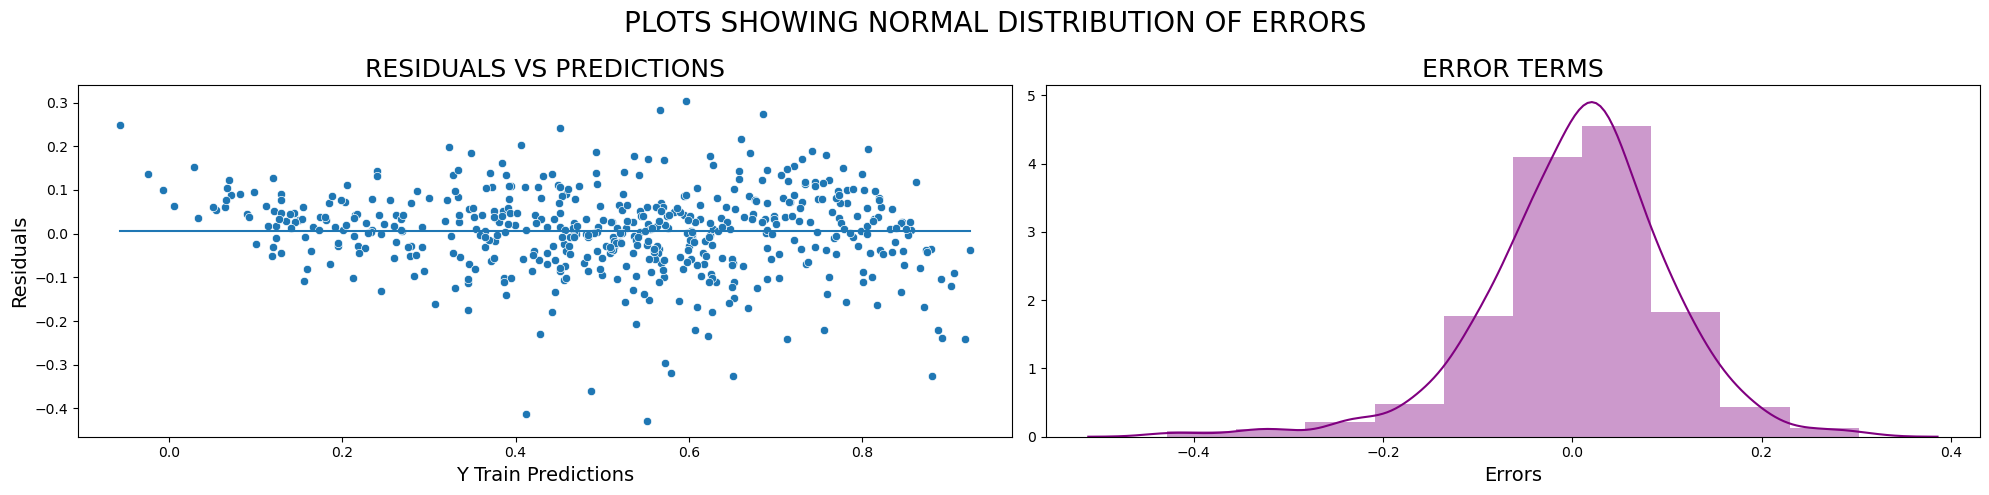

In [170]:
# Create a figure with 1 row and 2 columns of subplots with a specified size
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

# Add a title for the entire figure in uppercase and set the font size
plt.suptitle('Plots showing normal distribution of errors'.upper(), fontsize=20)

# Plot a scatterplot to visualize residuals vs predictions using seaborn
sns.scatterplot(y=residuals.values, x=y_train_pred.values, palette='Purples', ax=ax[0])

# Add a line plot representing the mean of residuals across the predictions on the same subplot
sns.lineplot(y=residuals.mean(), x=y_train_pred.values, palette='Purples', ax=ax[0])

# Set the title, x-label, and y-label for the first subplot (Residuals vs Predictions)
ax[0].set_title('residuals vs predictions'.upper(), fontsize=18)
ax[0].set_ylabel('residuals'.title(), fontsize=14)
ax[0].set_xlabel('y train predictions'.title(), fontsize=14)

# Create a distribution plot (histogram) of residuals to show their normal distribution on the second subplot
sns.distplot(residuals, bins=10, color='Purple', ax=ax[1])

# Set the title, x-label for the second subplot (Error Terms)
ax[1].set_title('error terms'.upper(), fontsize=18)
ax[1].set_ylabel('')  # Remove y-axis label for the second plot
ax[1].set_xlabel('errors'.title(), fontsize=14)

# Adjust subplot spacing to ensure everything fits well
plt.tight_layout()

# Display the figure
plt.show()

In [171]:
content="""<h3>Observations:</h3>
<ul style="font-size:15px">
<li>The residuals' mean is 0.00740, which is quite near to zero.</li>
<li>The residuals are found to be greater and concentrated above the mean value of 0 for smaller prediction values.</li>
<li>This supports our hypotheses that the errors around the mean of 0 have normal distributions.</li>
</ul>
"""
display(Markdown(content))

<h3>Observations:</h3>
<ul style="font-size:15px">
<li>The residuals' mean is 0.00740, which is quite near to zero.</li>
<li>The residuals are found to be greater and concentrated above the mean value of 0 for smaller prediction values.</li>
<li>This supports our hypotheses that the errors around the mean of 0 have normal distributions.</li>
</ul>


In [172]:
content="""<h3>#Section 5.7.1: Testing for Homoscedasticity</h3>"""
display(Markdown(content))

<h3>#Section 5.7.1: Testing for Homoscedasticity</h3>

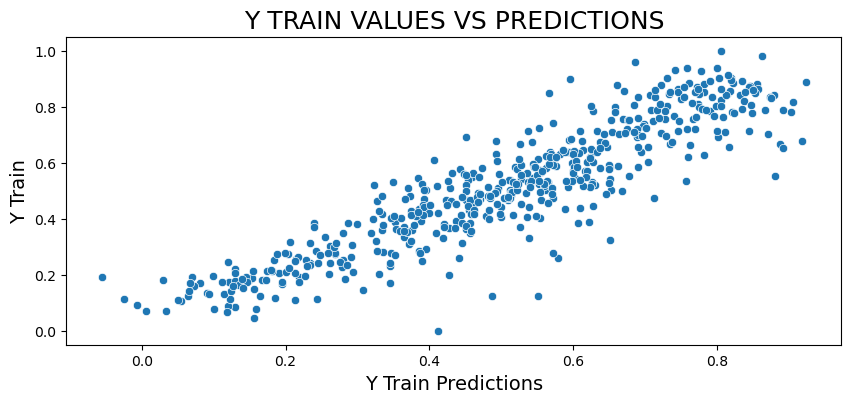

In [173]:
# Calculate residuals by subtracting the predicted values from the actual values
residuals = y_train - y_train_pred

# Create a figure with a specific size for the plot
plt.figure(figsize=(10, 4))

# Plot a scatterplot to visualize the actual values of y_train vs the predicted values (y_train_pred)
sns.scatterplot(y=y_train, x=y_train_pred, palette='Purples')

# Set the title of the plot in uppercase with a specific font size
plt.title('y train values vs predictions'.upper(), fontsize=18)

# Set the y-axis label as 'y train' with title case and a specific font size
plt.ylabel('y train'.title(), fontsize=14)

# Set the x-axis label as 'y train predictions' with title case and a specific font size
plt.xlabel('y train predictions'.title(), fontsize=14)

# Display the plot
plt.show()

In [174]:
content="""<h3>Observations:</h3>
<ul style="font-size:15px">
<li>The aforementioned graphic validates the hypothesis of homoscedasticity by displaying an essentially constant variation of predictions and, consequently, mistakes.</li>
</ul>
"""
display(Markdown(content))

<h3>Observations:</h3>
<ul style="font-size:15px">
<li>The aforementioned graphic validates the hypothesis of homoscedasticity by displaying an essentially constant variation of predictions and, consequently, mistakes.</li>
</ul>


In [175]:
content="""<h3>#Section 5.7.2: Testing for Correlation between error terms</h3>"""
display(Markdown(content))

<h3>#Section 5.7.2: Testing for Correlation between error terms</h3>

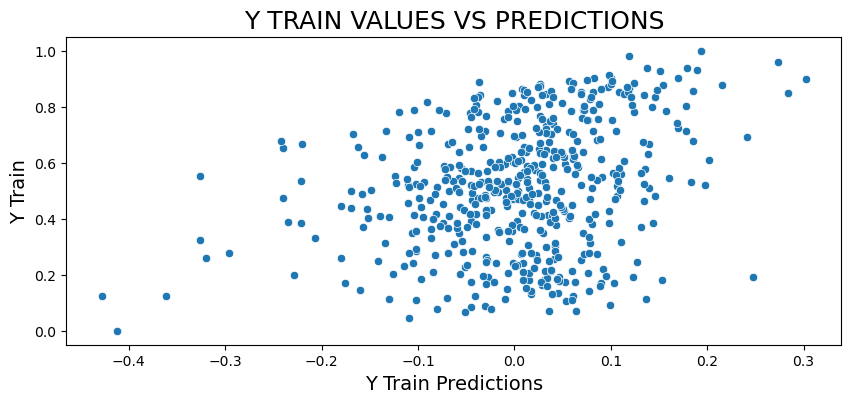

In [176]:
# Calculate residuals by subtracting the predicted values from the actual values
residuals = y_train - y_train_pred

# Create a figure with a specific size for the plot
plt.figure(figsize=(10, 4))

# Plot a scatterplot to visualize the actual values of y_train vs the residuals (difference between actual and predicted)
sns.scatterplot(y=y_train, x=residuals, palette='Purples')

# Set the title of the plot in uppercase with a specific font size
plt.title('y train values vs predictions'.upper(), fontsize=18)

# Set the y-axis label as 'y train' with title case and a specific font size
plt.ylabel('y train'.title(), fontsize=14)

# Set the x-axis label as 'y train predictions' with title case and a specific font size
plt.xlabel('y train predictions'.title(), fontsize=14)

# Display the plot
plt.show()

In [177]:
content="""<h2>#Section 5.8: Making Predictions</h2>
<h3>#Section 5.8.1: Applying Scaling on the Test Dataset</h3>
"""
display(Markdown(content))

<h2>#Section 5.8: Making Predictions</h2>
<h3>#Section 5.8.1: Applying Scaling on the Test Dataset</h3>


In [178]:
content="""<h4>We have already started our scaler instance of MinMaxScaler. We will rescale our test data variables using the same scaler. The variable scaler_list contains the scaled feature names that were obtained from the train set's rescaling operation. The same will be used to scale test data.</h4>
"""
display(Markdown(content))


<h4>We have already started our scaler instance of MinMaxScaler. We will rescale our test data variables using the same scaler. The variable scaler_list contains the scaled feature names that were obtained from the train set's rescaling operation. The same will be used to scale test data.</h4>


In [179]:
# Display a random sample of 5 rows from the bb_test DataFrame for inspection
bb_test.sample(5)

yr  holiday  workingday     temp    atemp      hum  windspeed   cnt  \
81    0        0           1 14.22524 16.89695 83.95650   15.69549  2121   
175   0        0           0 28.49500 32.16565 48.33330   14.04126  5202   
400   1        0           0 10.89915 13.22605 68.79170   11.79173  2947   
200   0        0           1 31.50165 37.34250 70.70830    7.62574  4332   
207   0        0           1 31.77500 34.53335 40.29170   12.29202  4656   

     Spring  Summer  ...    Oct    Sep    Mon    Sat    Sun    Thu    Tue  \
81    False    True  ...  False  False  False  False  False  False  False   
175   False   False  ...  False  False  False   True  False  False  False   
400    True   False  ...  False  False  False  False   True  False  False   
200   False   False  ...  False  False  False  False  False  False  False   
207   False   False  ...  False  False  False  False  False  False  False   

       Wed  Light Rain or Snow  Misty and Cloudy  
81    True               False              True  
175  False               False             False  
400  False               False              True  
200   True               False             False  
207   True               False             False  

[5 rows x 30 columns]

In [180]:
# Apply the previously fitted scaler to transform the features in the 'bb_test' dataset
bb_test[scaler_list] = scaler.transform(bb_test[scaler_list])


In [181]:
# Display a bb_test DataFrame for inspection after scaling
bb_test.sample(5)

yr  holiday  workingday    temp   atemp     hum  windspeed     cnt  \
201   0        0           1 0.94185 0.98093 0.71232    0.38636 0.43281   
503   1        0           0 0.67395 0.64035 0.47016    0.08958 0.95168   
648   1        0           1 0.46835 0.46218 0.47746    0.29945 0.86838   
719   1        0           1 0.33336 0.29232 0.57364    0.71390 0.41429   
646   1        0           1 0.48289 0.47129 0.78489    0.31816 0.73286   

     Spring  Summer  ...    Oct    Sep    Mon    Sat    Sun    Thu    Tue  \
201   False   False  ...  False  False  False  False  False   True  False   
503   False    True  ...  False  False  False   True  False  False  False   
648   False   False  ...   True  False  False  False  False   True  False   
719    True   False  ...  False  False  False  False  False  False  False   
646   False   False  ...   True  False  False  False  False  False   True   

       Wed  Light Rain or Snow  Misty and Cloudy  
201  False               False              True  
503  False               False             False  
648  False               False             False  
719  False               False              True  
646  False               False              True  

[5 rows x 30 columns]

In [182]:
content="""<h3>#Section 5.8.2: Partitioning the data into XTest and YTest</h3>"""
display(Markdown(content))

<h3>#Section 5.8.2: Partitioning the data into XTest and YTest</h3>

In [183]:
print(bb_test.columns)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Spring', 'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'Light Rain or Snow', 'Misty and Cloudy'],
      dtype='object')


In [184]:
# Extract the target variable 'cnt' from the bb_test DataFrame and assign it to y_test
y_test = bb_test.pop('cnt')

# Assign the remaining features from bb_test DataFrame to x_test
x_test = bb_test

In [185]:
# Checking x_test
x_test.head()

yr  holiday  workingday    temp   atemp     hum  windspeed  Spring  \
184   0        1           0 0.83178 0.76966 0.65736    0.08422   False   
535   1        0           1 0.90135 0.84259 0.61013    0.15373   False   
299   0        0           1 0.51196 0.49615 0.83770    0.33421   False   
221   0        0           1 0.88163 0.79534 0.43710    0.33957   False   
152   0        0           1 0.81725 0.74147 0.31430    0.53741   False   

     Summer  Winter  ...    Oct    Sep    Mon    Sat    Sun    Thu    Tue  \
184   False   False  ...  False  False   True  False  False  False  False   
535    True   False  ...  False  False  False  False  False  False  False   
299   False    True  ...   True  False  False  False  False   True  False   
221   False   False  ...  False  False  False  False  False  False  False   
152    True   False  ...  False  False  False  False  False   True  False   

       Wed  Light Rain or Snow  Misty and Cloudy  
184  False               False              True  
535   True               False             False  
299  False               False              True  
221   True               False             False  
152  False               False             False  

[5 rows x 29 columns]

In [186]:
# Checking the test set shape:

print(f'x_test shape is:{x_test.shape}')
print(f'y_test shape is:{y_test.shape}')

x_test shape is:(219, 29)
y_test shape is:(219,)


In [187]:
content="""<h3>#Section 5.8.3: Making Actual Predictions</h3>"""
display(Markdown(content))

<h3>#Section 5.8.3: Making Actual Predictions</h3>

In [188]:
# Select the columns from x_test that match the columns of x_train_5 for consistent feature alignment
x_test_new = x_test[x_train_5.columns]

In [189]:
# Predictions:

y_test_pred = lm.predict(x_test_new)


In [190]:
content="""<h2>#Section 5.9: Evaluating Predictions</h2>
"""
display(Markdown(content))

<h2>#Section 5.9: Evaluating Predictions</h2>


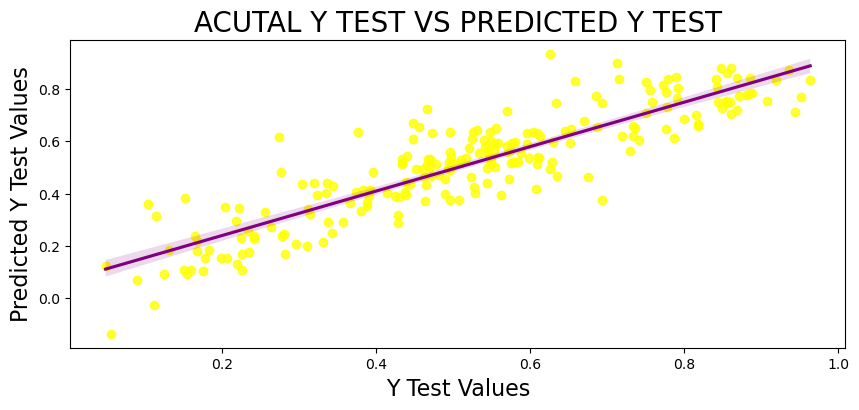

In [191]:
# Ensure that y_test and y_test_pred are numeric
y_test = pd.to_numeric(y_test, errors='coerce')
y_test_pred = pd.to_numeric(y_test_pred, errors='coerce')

# Create a figure for plotting with a specified size
fig = plt.figure(figsize=(10, 4))

# Plot a regression plot with 'y_test' on the x-axis and 'y_test_pred' on the y-axis
# 'scatter_kws' defines the color of the scatter points as yellow
# 'line_kws' defines the color of the regression line as purple
sns.regplot(x=y_test, y=y_test_pred, scatter_kws={'color':'yellow'}, line_kws={'color':'purple'})

# Set the title of the plot with font size 20 and make it uppercase
plt.title('Acutal Y test vs Predicted Y test'.upper(), fontsize=20)

# Label the x-axis and y-axis with appropriate font size of 16
plt.xlabel('Y Test Values', fontsize = 16)
plt.ylabel('Predicted Y Test Values', fontsize = 16)

# Display the plot
plt.show()

In [192]:
content="""<h3>Observations:</h3>
<ul style="font-size:15px">
<li>Our predictions are deemed to be a good fit since there is a clear visual similarity between the Y Test values and the expected values. Although there are few outliers, most of the points show a good fit by following a pattern on a larger scale.</li>
</ul>
"""
display(Markdown(content))

<h3>Observations:</h3>
<ul style="font-size:15px">
<li>Our predictions are deemed to be a good fit since there is a clear visual similarity between the Y Test values and the expected values. Although there are few outliers, most of the points show a good fit by following a pattern on a larger scale.</li>
</ul>


In [193]:
content="""<h2>#Section 5.10: Evaluating the Generalization Capability and Model Quality</h2>"""
display(Markdown(content))

<h2>#Section 5.10: Evaluating the Generalization Capability and Model Quality</h2>

In [194]:
print('R2 score of test data predictions:',r2_score(y_test, y_test_pred))
print('R2 score of train data predictions:', round(r2_score(y_pred=y_train_pred,y_true=y_train),5))
print('Absolute difference between R2 scores of the test and train dataset predictions:',
 abs(round(r2_score(y_pred=y_test_pred,y_true=y_test) - r2_score(y_pred = y_train_pred, y_true=y_train),5)))

R2 score of test data predictions: 0.7840857277206918
R2 score of train data predictions: 0.81537
Absolute difference between R2 scores of the test and train dataset predictions: 0.03128


In [195]:
content="""<h2>#Section 5.11: Predictive equation</h2>"""
display(Markdown(content))

<h2>#Section 5.11: Predictive equation</h2>

In [196]:
const = 0.2042  # Data taken from x_train_5 OLS model result above

# Create a pandas Series object from the OLS model parameters
parameter_series = pd.Series(lm.params)

# Print the parameter series to see the coefficients of the regression model
print(parameter_series)

yr                    0.24025
workingday            0.08603
temp                  0.64735
windspeed            -0.05843
Spring               -0.03051
Winter                0.10697
Jul                  -0.08905
Sep                   0.05188
Sat                   0.09702
Light Rain or Snow   -0.28881
Misty and Cloudy     -0.06897
dtype: float64


In [197]:
print(f'Demand= {round(const,3)}')
for i in range(len(parameter_series)):
	if i !=len(parameter_series)-1:
		print(f'\t{parameter_series.index[i]} x {round(parameter_series.values[i], 3)} + ')
	else:
		print(f'\t{parameter_series.index[i]} x {round(parameter_series.values[i], 3)} ')

Demand= 0.204
	yr x 0.24 + 
	workingday x 0.086 + 
	temp x 0.647 + 
	windspeed x -0.058 + 
	Spring x -0.031 + 
	Winter x 0.107 + 
	Jul x -0.089 + 
	Sep x 0.052 + 
	Sat x 0.097 + 
	Light Rain or Snow x -0.289 + 
	Misty and Cloudy x -0.069 


In [198]:
content="""<h3>Observations:</h3>
<ul style="font-size:15px">
<li>Coefficients of Year, Temperature, Working Day, Saturday, Winter and September are positive.</li>
<li>Coefficients of Light Rain or Snow, Misty and Cloudy, Spring, July and Windspeed are negative</li>
<li>Constant is 0.20. That is, if all variables are kept as 0, the demand will be 0.204</li>
</ul>
"""
display(Markdown(content))

<h3>Observations:</h3>
<ul style="font-size:15px">
<li>Coefficients of Year, Temperature, Working Day, Saturday, Winter and September are positive.</li>
<li>Coefficients of Light Rain or Snow, Misty and Cloudy, Spring, July and Windspeed are negative</li>
<li>Constant is 0.20. That is, if all variables are kept as 0, the demand will be 0.204</li>
</ul>


In [199]:
content="""<h3>Model Explanation:</h3>
<p style='font-size:15px'>Based on the regression coefficients provided, the model aims to predict demand based on various factors that influence
the demand for a service or product (perhaps bike rentals, as inferred from the context of seasonal and weather-related variables).
</p>
<p style='font-size:15px'>
<span style="font-weight:bold">The equation can be interpreted as:</span>

Demand = 0.204 + (0.24 * yr) + (0.086 * workingday) + (0.647 * temp) + (-0.058 * windspeed) + (-0.031 * Spring) + (0.107 * Winter) + 
(-0.089 * Jul) + (0.052 * Sep) + (0.097 * Sat) + (-0.289 * Light Rain or Snow) + (-0.069 * Misty and Cloudy)
</p>
<p style="font-size:15px">

<span style="font-weight:bold">Key Insights:</span>
1. Year (yr): The positive coefficient (0.24) suggests that demand increases as the years progress. As time moves forward, there may be increased availability, popularity, or other factors that boost demand.

2. Working Day (workingday): The positive coefficient (0.086) indicates that demand tends to be higher on working days compared to non-working days. This suggests that people might need the service (e.g., transportation or rentals) more on weekdays for commuting purposes.

3. Temperature (temp): The highest positive coefficient (0.647) emphasizes a significant positive relationship between temperature and demand. Warmer weather likely increases demand, which is intuitive in many contexts like outdoor activities or bike rentals.

4. Windspeed (windspeed): The negative coefficient (-0.058) shows that higher wind speeds slightly decrease demand. This makes sense as higher winds may deter people from engaging in certain outdoor activities or using services that are weather-sensitive.

5. Spring (Spring): The negative coefficient (-0.031) for the Spring season suggests that demand is slightly lower in Spring compared to other seasons. This could be due to seasonal variations in the type of demand (e.g., colder weather leading to less outdoor activity).

6. Winter (Winter): The positive coefficient (0.107) for Winter indicates a mild increase in demand during colder months, possibly due to specific services or promotions designed for the season or the type of activities that are popular during winter.

<span style="font-weight:bold">Month-Based Variables:</span>

1. July (Jul): The negative coefficient (-0.089) for July suggests that demand tends to decrease during this month, possibly due to holidays, vacations, or people taking breaks from certain activities.
2. September (Sep): The positive coefficient (0.052) for September indicates that demand increases in this month. This could be related to back-to-school or more people returning to regular routines.

1. Saturday (Sat): The positive coefficient (0.097) for Saturday shows that demand tends to rise on weekends, likely due to increased leisure activities or free time during weekends.

<span style="font-weight:bold">Weather Conditions:</span>

1. Light Rain or Snow (Light Rain or Snow): The large negative coefficient (-0.289) suggests that demand significantly decreases in light rain or snow, as bad weather generally discourages people from using certain services or engaging in outdoor activities.
2. Misty and Cloudy (Misty and Cloudy): The negative coefficient (-0.069) also shows a slight decrease in demand when the weather is misty or cloudy, reinforcing the idea that poor weather conditions negatively affect demand.</p>
"""
display(Markdown(content))

<h3>Model Explanation:</h3>
<p style='font-size:15px'>Based on the regression coefficients provided, the model aims to predict demand based on various factors that influence
the demand for a service or product (perhaps bike rentals, as inferred from the context of seasonal and weather-related variables).
</p>
<p style='font-size:15px'>
<span style="font-weight:bold">The equation can be interpreted as:</span>

Demand = 0.204 + (0.24 * yr) + (0.086 * workingday) + (0.647 * temp) + (-0.058 * windspeed) + (-0.031 * Spring) + (0.107 * Winter) + 
(-0.089 * Jul) + (0.052 * Sep) + (0.097 * Sat) + (-0.289 * Light Rain or Snow) + (-0.069 * Misty and Cloudy)
</p>
<p style="font-size:15px">

<span style="font-weight:bold">Key Insights:</span>
1. Year (yr): The positive coefficient (0.24) suggests that demand increases as the years progress. As time moves forward, there may be increased availability, popularity, or other factors that boost demand.

2. Working Day (workingday): The positive coefficient (0.086) indicates that demand tends to be higher on working days compared to non-working days. This suggests that people might need the service (e.g., transportation or rentals) more on weekdays for commuting purposes.

3. Temperature (temp): The highest positive coefficient (0.647) emphasizes a significant positive relationship between temperature and demand. Warmer weather likely increases demand, which is intuitive in many contexts like outdoor activities or bike rentals.

4. Windspeed (windspeed): The negative coefficient (-0.058) shows that higher wind speeds slightly decrease demand. This makes sense as higher winds may deter people from engaging in certain outdoor activities or using services that are weather-sensitive.

5. Spring (Spring): The negative coefficient (-0.031) for the Spring season suggests that demand is slightly lower in Spring compared to other seasons. This could be due to seasonal variations in the type of demand (e.g., colder weather leading to less outdoor activity).

6. Winter (Winter): The positive coefficient (0.107) for Winter indicates a mild increase in demand during colder months, possibly due to specific services or promotions designed for the season or the type of activities that are popular during winter.

<span style="font-weight:bold">Month-Based Variables:</span>

1. July (Jul): The negative coefficient (-0.089) for July suggests that demand tends to decrease during this month, possibly due to holidays, vacations, or people taking breaks from certain activities.
2. September (Sep): The positive coefficient (0.052) for September indicates that demand increases in this month. This could be related to back-to-school or more people returning to regular routines.

1. Saturday (Sat): The positive coefficient (0.097) for Saturday shows that demand tends to rise on weekends, likely due to increased leisure activities or free time during weekends.

<span style="font-weight:bold">Weather Conditions:</span>

1. Light Rain or Snow (Light Rain or Snow): The large negative coefficient (-0.289) suggests that demand significantly decreases in light rain or snow, as bad weather generally discourages people from using certain services or engaging in outdoor activities.
2. Misty and Cloudy (Misty and Cloudy): The negative coefficient (-0.069) also shows a slight decrease in demand when the weather is misty or cloudy, reinforcing the idea that poor weather conditions negatively affect demand.</p>


In [200]:
def nImpFeatures(series,n):
	series = series.sort_values(key = lambda x:abs(x), ascending = False)
	return series.head(n)

In [201]:
descending_imp = nImpFeatures(parameter_series, len(parameter_series))
descending_imp

temp                  0.64735
Light Rain or Snow   -0.28881
yr                    0.24025
Winter                0.10697
Sat                   0.09702
Jul                  -0.08905
workingday            0.08603
Misty and Cloudy     -0.06897
windspeed            -0.05843
Sep                   0.05188
Spring               -0.03051
dtype: float64

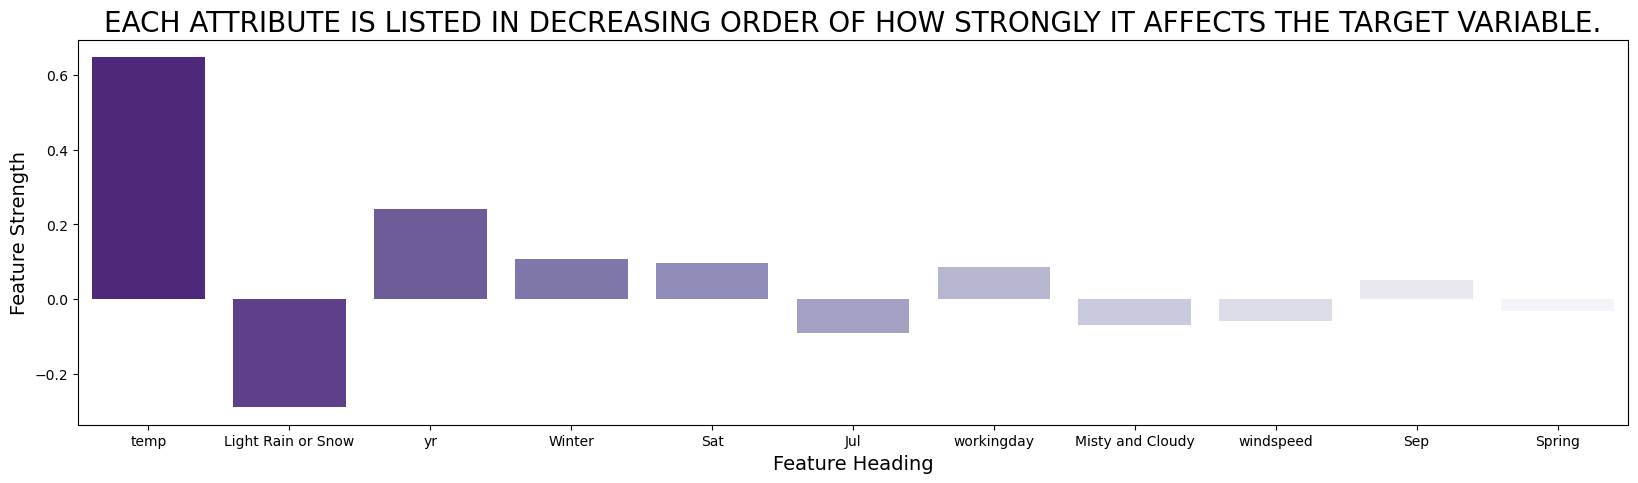

In [202]:
# Create a figure for plotting with a specified size
fig = plt.figure(figsize=(20, 5))


sns.barplot(x=descending_imp.index, y=descending_imp.values, palette='Purples_r')

# Set the title of the plot with font size 20 and make it uppercase
plt.title('Each attribute is listed in decreasing order of how strongly it affects the target variable.'.upper(), fontsize=20)

# Label the x-axis and y-axis with appropriate font size of 16
plt.xlabel('Feature Heading', fontsize = 14)
plt.ylabel('Feature Strength', fontsize = 14)

# Display the plot
plt.show()

In [203]:
content="""<h1>#Section 6: Final Recommendations</h1>"""
display(Markdown(content))

<h1>#Section 6: Final Recommendations</h1>

In [204]:
top5_features = nImpFeatures(parameter_series,5)
top5_features

temp                  0.64735
Light Rain or Snow   -0.28881
yr                    0.24025
Winter                0.10697
Sat                   0.09702
dtype: float64

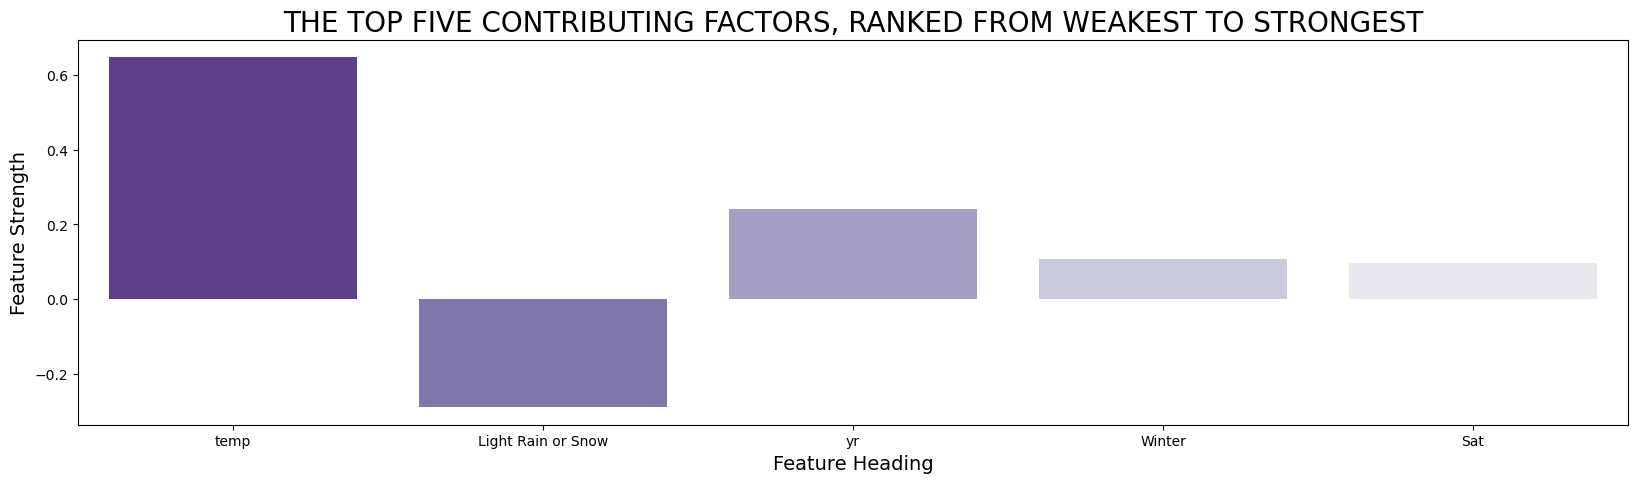

In [205]:
# Create a figure for plotting with a specified size
fig = plt.figure(figsize=(20, 5))


sns.barplot(x=top5_features.index, y=top5_features.values, palette='Purples_r')

# Set the title of the plot with font size 20 and make it uppercase
plt.title('The top five contributing factors, ranked from weakest to strongest'.upper(), fontsize=20)

# Label the x-axis and y-axis with appropriate font size of 16
plt.xlabel('Feature Heading', fontsize = 14)
plt.ylabel('Feature Strength', fontsize = 14)

# Display the plot
plt.show()

In [206]:
content="""<h3>Business Recommendations:</h3>
<p style='font-size:15px'>The factors influencing demand for shared bikes in the American market are temperature, weather conditions, and time-related factors.
</p>
<p style="font-size:15px">

<span style="font-weight:bold">Key Insights:</span>
1. Temperature (temp) has the highest positive impact (0.64735) on bike demand, indicating that warmer temperatures significantly increase bike usage. People are more likely to use bikes in favorable weather conditions.

2. Light Rain or Snow (-0.28881) negatively impacts bike demand. Adverse weather discourages cycling due to discomfort and safety concerns.

3. Year (yr) (0.24025) indicates a growing demand for shared bikes over time, suggesting increased adoption of bike-sharing services.

4. Winter (Winter) (0.10697) has a slight positive impact, meaning there is some demand even in colder months, though it’s not as strong as the effects of temperature.

5. Saturday (Sat) (0.09702) shows that demand is higher on weekends, possibly due to people having more free time for recreational activities.

</p>



<span style="font-weight:bold">1. Most Important Factor: Temperature (temp)</span>
<p style="font-size:15px">
Impact: Highly positive (0.64735). Warmer temperatures significantly drive bike demand as people are more inclined to use bikes in favorable weather.
Improvement: To capitalize on this, bike-sharing services can focus on increasing availability and marketing efforts during warmer months. They can also introduce climate-controlled bike stations for a more comfortable experience in fluctuating temperatures.
</p>
<span style="font-weight:bold">2nd Most Important Factor: Year (yr)</span>
<p style="font-size:15px">
Impact: Positive (0.24025). There’s an upward trend in demand for shared bikes over the years, showing that more people are using these services.
Improvement: To sustain this growth, the service can invest in expanding its network, making bikes more accessible, and focusing on building awareness. Implementing loyalty programs could also increase retention over time.
</p>
<span style="font-weight:bold">3rd Most Important Factor: Light Rain or Snow (Light Rain or Snow)</span>
<p style="font-size:15px">
Impact: Negative (-0.28881). Weather conditions like light rain or snow deter people from using bikes due to discomfort and safety concerns.
Improvement: Offer weather-proof bikes with features like rain covers, and introduce flexible pricing models during adverse weather (e.g., discounts or increased availability of indoor bike stations).
</p>
<span style="font-weight:bold">4th Most Important Factor: Year (Winter)</span>
<p style="font-size:15px">
Impact: Slightly positive (0.10697). There's a small demand in winter months, though less than in other seasons.
Improvement: Winter promotions, such as discounts or special winter services, could encourage people to use bikes even during colder months. Introducing bikes equipped for winter conditions (e.g., with studded tires) would also help.
</p>
<span style="font-weight:bold">5th Most Important Factor: Saturday (Sat)</span>
<p style="font-size:15px">Impact: Positive (0.09702). People use bikes more on weekends, likely due to more leisure activities and free time.
Improvement: Marketing campaigns and events specifically targeting weekend users, such as "weekend special offers," could increase demand. Special features for tourists and recreational users could also drive weekend usage.
</p>


<h3 style="font-weight:bold;">Recommendations</h3>
<p style="font-size:15px">
1. Seasonal Focus: Prioritize operations and marketing during warmer months to capitalize on higher demand.</p>
<p style="font-size:15px">
2. Weather Adaptation: Implement weather-specific promotions to encourage bike use in rainy or snowy conditions.</p>
<p style="font-size:15px">
3. Year-Round Engagement: Focus on strategies to sustain growth year-round, including expanding services and improving infrastructure.</p>

"""
display(Markdown(content))

<h3>Business Recommendations:</h3>
<p style='font-size:15px'>The factors influencing demand for shared bikes in the American market are temperature, weather conditions, and time-related factors.
</p>
<p style="font-size:15px">

<span style="font-weight:bold">Key Insights:</span>
1. Temperature (temp) has the highest positive impact (0.64735) on bike demand, indicating that warmer temperatures significantly increase bike usage. People are more likely to use bikes in favorable weather conditions.

2. Light Rain or Snow (-0.28881) negatively impacts bike demand. Adverse weather discourages cycling due to discomfort and safety concerns.

3. Year (yr) (0.24025) indicates a growing demand for shared bikes over time, suggesting increased adoption of bike-sharing services.

4. Winter (Winter) (0.10697) has a slight positive impact, meaning there is some demand even in colder months, though it’s not as strong as the effects of temperature.

5. Saturday (Sat) (0.09702) shows that demand is higher on weekends, possibly due to people having more free time for recreational activities.

</p>



<span style="font-weight:bold">1. Most Important Factor: Temperature (temp)</span>
<p style="font-size:15px">
Impact: Highly positive (0.64735). Warmer temperatures significantly drive bike demand as people are more inclined to use bikes in favorable weather.
Improvement: To capitalize on this, bike-sharing services can focus on increasing availability and marketing efforts during warmer months. They can also introduce climate-controlled bike stations for a more comfortable experience in fluctuating temperatures.
</p>
<span style="font-weight:bold">2nd Most Important Factor: Year (yr)</span>
<p style="font-size:15px">
Impact: Positive (0.24025). There’s an upward trend in demand for shared bikes over the years, showing that more people are using these services.
Improvement: To sustain this growth, the service can invest in expanding its network, making bikes more accessible, and focusing on building awareness. Implementing loyalty programs could also increase retention over time.
</p>
<span style="font-weight:bold">3rd Most Important Factor: Light Rain or Snow (Light Rain or Snow)</span>
<p style="font-size:15px">
Impact: Negative (-0.28881). Weather conditions like light rain or snow deter people from using bikes due to discomfort and safety concerns.
Improvement: Offer weather-proof bikes with features like rain covers, and introduce flexible pricing models during adverse weather (e.g., discounts or increased availability of indoor bike stations).
</p>
<span style="font-weight:bold">4th Most Important Factor: Year (Winter)</span>
<p style="font-size:15px">
Impact: Slightly positive (0.10697). There's a small demand in winter months, though less than in other seasons.
Improvement: Winter promotions, such as discounts or special winter services, could encourage people to use bikes even during colder months. Introducing bikes equipped for winter conditions (e.g., with studded tires) would also help.
</p>
<span style="font-weight:bold">5th Most Important Factor: Saturday (Sat)</span>
<p style="font-size:15px">Impact: Positive (0.09702). People use bikes more on weekends, likely due to more leisure activities and free time.
Improvement: Marketing campaigns and events specifically targeting weekend users, such as "weekend special offers," could increase demand. Special features for tourists and recreational users could also drive weekend usage.
</p>


<h3 style="font-weight:bold;">Recommendations</h3>
<p style="font-size:15px">
1. Seasonal Focus: Prioritize operations and marketing during warmer months to capitalize on higher demand.</p>
<p style="font-size:15px">
2. Weather Adaptation: Implement weather-specific promotions to encourage bike use in rainy or snowy conditions.</p>
<p style="font-size:15px">
3. Year-Round Engagement: Focus on strategies to sustain growth year-round, including expanding services and improving infrastructure.</p>

